## Displaying the actual dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import date
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings(action="ignore")
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df=pd.read_csv('1805809.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200353024,DECA us,2019-09-16 00:00:00,2019.0,1.929839e+09,2019-09-06,20190906,20190906,20190924.0,USD,RV,1.0,NaN,1743.88,20190901.0,NAM4,1.929839e+09,0
1,U001,0200762301,C&S WH us,2019-06-03 00:00:00,2019.0,1.929325e+09,2019-05-17,20190515,20190517,20190601.0,USD,RV,1.0,NaN,102033.31,20190517.0,NAC6,1.929325e+09,0
2,U001,0100036538,DENVER corporation,2019-06-03 00:00:00,2019.0,1.929375e+09,2019-05-24,20190524,20190524,20190608.0,USD,RV,1.0,NaN,8078.40,20190524.0,NAA8,1.929375e+09,0
3,U001,CCCA02,KRAFT co,2019-08-30 00:00:00,2019.0,1.929054e+09,2019-04-01,20190330,20190401,20190506.0,USD,RV,1.0,NaN,11053.44,20190401.0,NAG2,1.929054e+09,0
4,CA02,0140104429,COSTCO corporation,2019-06-13 00:00:00,2019.0,2.960551e+09,2019-05-27,20190527,20190527,20190613.0,CAD,RV,1.0,NaN,12284.77,20190603.0,CA10,2.960551e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S llc,NaN,2020.0,1.930853e+09,2020-05-02,20200502,20200502,20200517.0,USD,RV,1.0,NaN,107.26,20200502.0,NAA8,1.930853e+09,1
49996,U001,CCCA02,KRAFT co,NaN,2020.0,1.930669e+09,2020-03-19,20200318,20200319,20200423.0,USD,RV,1.0,NaN,16934.40,20200319.0,NAG2,1.930669e+09,1
49997,U001,0200920735,ALBERT systems,NaN,2020.0,1.930735e+09,2020-04-08,20200402,20200408,20200423.0,USD,RV,1.0,NaN,31220.28,20200408.0,NAA8,1.930735e+09,1
49998,U001,0200592182,DECA corporation,NaN,2020.0,1.930887e+09,2020-05-12,20200512,20200512,20200511.0,USD,RV,1.0,NaN,4810.08,20200501.0,NAM2,1.930887e+09,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45255 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# Splitting the dataset into test data and rest data on the basis of clear_date null value

In [3]:
test_data=df[df['clear_date'].isnull()]    
rest_data=df[df['clear_date'].notnull()]

# Test Dataset

In [4]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45255,CA02,0140105508,DOLLARA in,NaN,2020.0,2.960621e+09,2020-03-15,20200315,20200315,20200328.0,CAD,RV,1.0,NaN,11698.82,20200318.0,CA10,2.960621e+09,1
45256,U001,0200707822,PUBLI corp,NaN,2020.0,1.930666e+09,2020-03-17,20200318,20200317,20200401.0,USD,RV,1.0,NaN,23157.00,20200317.0,NAA8,1.930666e+09,1
45257,U001,0200762301,C&S WH co,NaN,2020.0,1.930586e+09,2020-03-03,20200302,20200303,20200507.0,USD,RV,1.0,NaN,959.61,20200303.0,NAGD,1.930586e+09,1
45258,U001,0100015557,BI us,NaN,2020.0,1.930839e+09,2020-04-03,20200429,20200403,20200418.0,USD,RV,1.0,NaN,10244.56,20200403.0,NAA8,1.930839e+09,1
45259,U001,200769623,WAL-MAR corporation,NaN,2020.0,1.930884e+09,2020-05-09,20200509,20200509,20200524.0,USD,RV,1.0,NaN,54572.70,20200509.0,NAH4,1.930884e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S llc,NaN,2020.0,1.930853e+09,2020-05-02,20200502,20200502,20200517.0,USD,RV,1.0,NaN,107.26,20200502.0,NAA8,1.930853e+09,1
49996,U001,CCCA02,KRAFT co,NaN,2020.0,1.930669e+09,2020-03-19,20200318,20200319,20200423.0,USD,RV,1.0,NaN,16934.40,20200319.0,NAG2,1.930669e+09,1
49997,U001,0200920735,ALBERT systems,NaN,2020.0,1.930735e+09,2020-04-08,20200402,20200408,20200423.0,USD,RV,1.0,NaN,31220.28,20200408.0,NAA8,1.930735e+09,1
49998,U001,0200592182,DECA corporation,NaN,2020.0,1.930887e+09,2020-05-12,20200512,20200512,20200511.0,USD,RV,1.0,NaN,4810.08,20200501.0,NAM2,1.930887e+09,1


# Rest Data

In [5]:
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200353024,DECA us,2019-09-16 00:00:00,2019.0,1.929839e+09,2019-09-06,20190906,20190906,20190924.0,USD,RV,1.0,NaN,1743.88,20190901.0,NAM4,1.929839e+09,0
1,U001,0200762301,C&S WH us,2019-06-03 00:00:00,2019.0,1.929325e+09,2019-05-17,20190515,20190517,20190601.0,USD,RV,1.0,NaN,102033.31,20190517.0,NAC6,1.929325e+09,0
2,U001,0100036538,DENVER corporation,2019-06-03 00:00:00,2019.0,1.929375e+09,2019-05-24,20190524,20190524,20190608.0,USD,RV,1.0,NaN,8078.40,20190524.0,NAA8,1.929375e+09,0
3,U001,CCCA02,KRAFT co,2019-08-30 00:00:00,2019.0,1.929054e+09,2019-04-01,20190330,20190401,20190506.0,USD,RV,1.0,NaN,11053.44,20190401.0,NAG2,1.929054e+09,0
4,CA02,0140104429,COSTCO corporation,2019-06-13 00:00:00,2019.0,2.960551e+09,2019-05-27,20190527,20190527,20190613.0,CAD,RV,1.0,NaN,12284.77,20190603.0,CA10,2.960551e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,0200769623,WAL-MAR systems,2020-03-25 00:00:00,2020.0,1.930400e+09,2020-01-16,20200115,20200116,20200131.0,USD,RV,1.0,NaN,524.66,20200116.0,NAH4,1.930400e+09,0
45251,U001,0200793830,M corp,2019-07-08 00:00:00,2019.0,1.929531e+09,2019-06-22,20190623,20190622,20190707.0,USD,RV,1.0,NaN,70659.41,20190622.0,NAA8,1.929531e+09,0
45252,U001,200152991,JET trust,2019-02-20 00:00:00,2019.0,1.928745e+09,2019-02-05,20190205,20190205,20190220.0,USD,RV,1.0,NaN,1171.18,20190205.0,NAA8,1.928745e+09,0
45253,U001,0200750051,ALBER systems,2019-12-09 00:00:00,2019.0,1.929960e+09,2019-10-04,20191004,20191004,20191208.0,USD,RV,1.0,NaN,37359.44,20191004.0,NAGD,1.929960e+09,0


# Preprocessing

## Checking Anomalies

In [6]:
#Removing Document_create_date as it is redundant and same as Document_create_date.1
rest_data=rest_data.drop(['document_create_date'],axis=1)
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200353024,DECA us,2019-09-16 00:00:00,2019.0,1.929839e+09,2019-09-06,20190906,20190924.0,USD,RV,1.0,NaN,1743.88,20190901.0,NAM4,1.929839e+09,0
1,U001,0200762301,C&S WH us,2019-06-03 00:00:00,2019.0,1.929325e+09,2019-05-17,20190517,20190601.0,USD,RV,1.0,NaN,102033.31,20190517.0,NAC6,1.929325e+09,0
2,U001,0100036538,DENVER corporation,2019-06-03 00:00:00,2019.0,1.929375e+09,2019-05-24,20190524,20190608.0,USD,RV,1.0,NaN,8078.40,20190524.0,NAA8,1.929375e+09,0
3,U001,CCCA02,KRAFT co,2019-08-30 00:00:00,2019.0,1.929054e+09,2019-04-01,20190401,20190506.0,USD,RV,1.0,NaN,11053.44,20190401.0,NAG2,1.929054e+09,0
4,CA02,0140104429,COSTCO corporation,2019-06-13 00:00:00,2019.0,2.960551e+09,2019-05-27,20190527,20190613.0,CAD,RV,1.0,NaN,12284.77,20190603.0,CA10,2.960551e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,0200769623,WAL-MAR systems,2020-03-25 00:00:00,2020.0,1.930400e+09,2020-01-16,20200116,20200131.0,USD,RV,1.0,NaN,524.66,20200116.0,NAH4,1.930400e+09,0
45251,U001,0200793830,M corp,2019-07-08 00:00:00,2019.0,1.929531e+09,2019-06-22,20190622,20190707.0,USD,RV,1.0,NaN,70659.41,20190622.0,NAA8,1.929531e+09,0
45252,U001,200152991,JET trust,2019-02-20 00:00:00,2019.0,1.928745e+09,2019-02-05,20190205,20190220.0,USD,RV,1.0,NaN,1171.18,20190205.0,NAA8,1.928745e+09,0
45253,U001,0200750051,ALBER systems,2019-12-09 00:00:00,2019.0,1.929960e+09,2019-10-04,20191004,20191208.0,USD,RV,1.0,NaN,37359.44,20191004.0,NAGD,1.929960e+09,0


In [7]:
# correcting the date formats 
rest_data['posting_date'] = pd.to_datetime(rest_data['posting_date'], format='%Y/%m/%d')
rest_data['baseline_create_date'] = pd.to_datetime(rest_data['baseline_create_date'], format='%Y%m%d')
rest_data['document_create_date.1'] = pd.to_datetime(rest_data['document_create_date.1'].astype(str), format='%Y-%m-%d')
rest_data['clear_date'] = pd.to_datetime(rest_data['clear_date'].astype(str), format='%Y-%m-%d')
rest_data['due_in_date'] = pd.to_datetime(rest_data['due_in_date'], format='%Y%m%d')
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200353024,DECA us,2019-09-16,2019.0,1.929839e+09,2019-09-06,2019-09-06,2019-09-24,USD,RV,1.0,NaN,1743.88,2019-09-01,NAM4,1.929839e+09,0
1,U001,0200762301,C&S WH us,2019-06-03,2019.0,1.929325e+09,2019-05-17,2019-05-17,2019-06-01,USD,RV,1.0,NaN,102033.31,2019-05-17,NAC6,1.929325e+09,0
2,U001,0100036538,DENVER corporation,2019-06-03,2019.0,1.929375e+09,2019-05-24,2019-05-24,2019-06-08,USD,RV,1.0,NaN,8078.40,2019-05-24,NAA8,1.929375e+09,0
3,U001,CCCA02,KRAFT co,2019-08-30,2019.0,1.929054e+09,2019-04-01,2019-04-01,2019-05-06,USD,RV,1.0,NaN,11053.44,2019-04-01,NAG2,1.929054e+09,0
4,CA02,0140104429,COSTCO corporation,2019-06-13,2019.0,2.960551e+09,2019-05-27,2019-05-27,2019-06-13,CAD,RV,1.0,NaN,12284.77,2019-06-03,CA10,2.960551e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,0200769623,WAL-MAR systems,2020-03-25,2020.0,1.930400e+09,2020-01-16,2020-01-16,2020-01-31,USD,RV,1.0,NaN,524.66,2020-01-16,NAH4,1.930400e+09,0
45251,U001,0200793830,M corp,2019-07-08,2019.0,1.929531e+09,2019-06-22,2019-06-22,2019-07-07,USD,RV,1.0,NaN,70659.41,2019-06-22,NAA8,1.929531e+09,0
45252,U001,200152991,JET trust,2019-02-20,2019.0,1.928745e+09,2019-02-05,2019-02-05,2019-02-20,USD,RV,1.0,NaN,1171.18,2019-02-05,NAA8,1.928745e+09,0
45253,U001,0200750051,ALBER systems,2019-12-09,2019.0,1.929960e+09,2019-10-04,2019-10-04,2019-12-08,USD,RV,1.0,NaN,37359.44,2019-10-04,NAGD,1.929960e+09,0


In [8]:
# Correcting the format cust_number,doc_id,invoice_id

# Removing leading zeros from cust_number
rest_data['cust_number']=rest_data['cust_number'].apply(lambda x:str(x).lstrip("0"))

# Removing any row with any null value and null column 
rest_data.dropna(how='all',inplace=True,axis=1)
rest_data.dropna(how='any',inplace=True,axis=0)

# Convert scientific notation to integers in invoice_id and doc_id
rest_data['invoice_id']=rest_data['invoice_id']=rest_data['invoice_id'].apply(lambda x: int(float(x)))
rest_data['doc_id']=rest_data['invoice_id']=rest_data['doc_id'].apply(lambda x: int(float(x)))
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200353024,DECA us,2019-09-16,2019.0,1929838935,2019-09-06,2019-09-06,2019-09-24,USD,RV,1.0,1743.88,2019-09-01,NAM4,1929838935,0
1,U001,200762301,C&S WH us,2019-06-03,2019.0,1929324501,2019-05-17,2019-05-17,2019-06-01,USD,RV,1.0,102033.31,2019-05-17,NAC6,1929324501,0
2,U001,100036538,DENVER corporation,2019-06-03,2019.0,1929374874,2019-05-24,2019-05-24,2019-06-08,USD,RV,1.0,8078.40,2019-05-24,NAA8,1929374874,0
3,U001,CCCA02,KRAFT co,2019-08-30,2019.0,1929054308,2019-04-01,2019-04-01,2019-05-06,USD,RV,1.0,11053.44,2019-04-01,NAG2,1929054308,0
4,CA02,140104429,COSTCO corporation,2019-06-13,2019.0,2960550902,2019-05-27,2019-05-27,2019-06-13,CAD,RV,1.0,12284.77,2019-06-03,CA10,2960550902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,200769623,WAL-MAR systems,2020-03-25,2020.0,1930399678,2020-01-16,2020-01-16,2020-01-31,USD,RV,1.0,524.66,2020-01-16,NAH4,1930399678,0
45251,U001,200793830,M corp,2019-07-08,2019.0,1929530698,2019-06-22,2019-06-22,2019-07-07,USD,RV,1.0,70659.41,2019-06-22,NAA8,1929530698,0
45252,U001,200152991,JET trust,2019-02-20,2019.0,1928744562,2019-02-05,2019-02-05,2019-02-20,USD,RV,1.0,1171.18,2019-02-05,NAA8,1928744562,0
45253,U001,200750051,ALBER systems,2019-12-09,2019.0,1929959556,2019-10-04,2019-10-04,2019-12-08,USD,RV,1.0,37359.44,2019-10-04,NAGD,1929959556,0


In [9]:
# comparing document_create_date.1 and posting_date
rest_data[rest_data['document_create_date.1']==rest_data['posting_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200353024,DECA us,2019-09-16,2019.0,1929838935,2019-09-06,2019-09-06,2019-09-24,USD,RV,1.0,1743.88,2019-09-01,NAM4,1929838935,0
1,U001,200762301,C&S WH us,2019-06-03,2019.0,1929324501,2019-05-17,2019-05-17,2019-06-01,USD,RV,1.0,102033.31,2019-05-17,NAC6,1929324501,0
2,U001,100036538,DENVER corporation,2019-06-03,2019.0,1929374874,2019-05-24,2019-05-24,2019-06-08,USD,RV,1.0,8078.40,2019-05-24,NAA8,1929374874,0
3,U001,CCCA02,KRAFT co,2019-08-30,2019.0,1929054308,2019-04-01,2019-04-01,2019-05-06,USD,RV,1.0,11053.44,2019-04-01,NAG2,1929054308,0
4,CA02,140104429,COSTCO corporation,2019-06-13,2019.0,2960550902,2019-05-27,2019-05-27,2019-06-13,CAD,RV,1.0,12284.77,2019-06-03,CA10,2960550902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,200769623,WAL-MAR systems,2020-03-25,2020.0,1930399678,2020-01-16,2020-01-16,2020-01-31,USD,RV,1.0,524.66,2020-01-16,NAH4,1930399678,0
45251,U001,200793830,M corp,2019-07-08,2019.0,1929530698,2019-06-22,2019-06-22,2019-07-07,USD,RV,1.0,70659.41,2019-06-22,NAA8,1929530698,0
45252,U001,200152991,JET trust,2019-02-20,2019.0,1928744562,2019-02-05,2019-02-05,2019-02-20,USD,RV,1.0,1171.18,2019-02-05,NAA8,1928744562,0
45253,U001,200750051,ALBER systems,2019-12-09,2019.0,1929959556,2019-10-04,2019-10-04,2019-12-08,USD,RV,1.0,37359.44,2019-10-04,NAGD,1929959556,0


#### Here we can see that document_create_date.1 and posting_date is identical so we can drop posting_date 

In [10]:
# Dropping posting_date
rest_data=rest_data.drop(['posting_date'],axis=1)
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200353024,DECA us,2019-09-16,2019.0,1929838935,2019-09-06,2019-09-24,USD,RV,1.0,1743.88,2019-09-01,NAM4,1929838935,0
1,U001,200762301,C&S WH us,2019-06-03,2019.0,1929324501,2019-05-17,2019-06-01,USD,RV,1.0,102033.31,2019-05-17,NAC6,1929324501,0
2,U001,100036538,DENVER corporation,2019-06-03,2019.0,1929374874,2019-05-24,2019-06-08,USD,RV,1.0,8078.40,2019-05-24,NAA8,1929374874,0
3,U001,CCCA02,KRAFT co,2019-08-30,2019.0,1929054308,2019-04-01,2019-05-06,USD,RV,1.0,11053.44,2019-04-01,NAG2,1929054308,0
4,CA02,140104429,COSTCO corporation,2019-06-13,2019.0,2960550902,2019-05-27,2019-06-13,CAD,RV,1.0,12284.77,2019-06-03,CA10,2960550902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,200769623,WAL-MAR systems,2020-03-25,2020.0,1930399678,2020-01-16,2020-01-31,USD,RV,1.0,524.66,2020-01-16,NAH4,1930399678,0
45251,U001,200793830,M corp,2019-07-08,2019.0,1929530698,2019-06-22,2019-07-07,USD,RV,1.0,70659.41,2019-06-22,NAA8,1929530698,0
45252,U001,200152991,JET trust,2019-02-20,2019.0,1928744562,2019-02-05,2019-02-20,USD,RV,1.0,1171.18,2019-02-05,NAA8,1928744562,0
45253,U001,200750051,ALBER systems,2019-12-09,2019.0,1929959556,2019-10-04,2019-12-08,USD,RV,1.0,37359.44,2019-10-04,NAGD,1929959556,0


In [11]:
# comparing document_create_date.1 and baseline_create_date
rest_data[rest_data['document_create_date.1']>rest_data['baseline_create_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200353024,DECA us,2019-09-16,2019.0,1929838935,2019-09-06,2019-09-24,USD,RV,1.0,1743.88,2019-09-01,NAM4,1929838935,0
38,U001,200416837,DEC,2019-10-10,2019.0,1929960068,2019-10-04,2019-10-11,USD,RV,1.0,592.68,2019-10-01,NAM2,1929960068,0
43,U001,200416837,DEC in,2019-04-26,2019.0,1929168364,2019-04-18,2019-04-23,USD,RV,1.0,20082.39,2019-04-16,NAM1,1929168364,0
63,U001,200020431,DEC systems,2019-09-16,2019.0,1929858209,2019-09-10,2019-09-24,USD,RV,1.0,371.16,2019-09-01,NAM4,1929858209,0
84,U001,200353024,DECA co,2019-08-26,2019.0,1929772375,2019-08-23,2019-08-23,USD,RV,1.0,8107.44,2019-08-16,NAM1,1929772375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45159,U001,200230690,DECA us,2019-01-15,2019.0,1928561274,2019-01-03,2019-01-24,USD,RV,1.0,955.08,2019-01-01,NAM4,1928561274,0
45174,U001,200230690,DECA foundation,2019-05-10,2019.0,1929258023,2019-05-04,2019-05-11,USD,RV,1.0,19196.76,2019-05-01,NAM2,1929258023,0
45193,U001,200416837,DEC in,2019-12-02,2019.0,1930187172,2019-11-23,2019-12-09,USD,RV,1.0,3298.88,2019-11-16,NAM4,1930187172,0
45244,U001,200592182,DECA corp,2019-12-30,2019.0,1930324813,2019-12-27,2020-01-08,USD,RV,1.0,35.40,2019-12-16,NAM4,1930324813,0


#### Since document_create_date.1 should be less than baseline_create_date so it is an anomaly

In [12]:
# Deleting rows that have document_create_date.1>baseline_create_date
rest_data.drop(rest_data[rest_data['document_create_date.1']>rest_data['baseline_create_date']].index,inplace=True)
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200762301,C&S WH us,2019-06-03,2019.0,1929324501,2019-05-17,2019-06-01,USD,RV,1.0,102033.31,2019-05-17,NAC6,1929324501,0
2,U001,100036538,DENVER corporation,2019-06-03,2019.0,1929374874,2019-05-24,2019-06-08,USD,RV,1.0,8078.40,2019-05-24,NAA8,1929374874,0
3,U001,CCCA02,KRAFT co,2019-08-30,2019.0,1929054308,2019-04-01,2019-05-06,USD,RV,1.0,11053.44,2019-04-01,NAG2,1929054308,0
4,CA02,140104429,COSTCO corporation,2019-06-13,2019.0,2960550902,2019-05-27,2019-06-13,CAD,RV,1.0,12284.77,2019-06-03,CA10,2960550902,0
5,U001,200561861,CO corp,2019-11-01,2019.0,1930027494,2019-10-18,2019-11-02,USD,RV,1.0,3238.71,2019-10-18,NAA8,1930027494,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,200769623,WAL-MAR systems,2020-03-25,2020.0,1930399678,2020-01-16,2020-01-31,USD,RV,1.0,524.66,2020-01-16,NAH4,1930399678,0
45251,U001,200793830,M corp,2019-07-08,2019.0,1929530698,2019-06-22,2019-07-07,USD,RV,1.0,70659.41,2019-06-22,NAA8,1929530698,0
45252,U001,200152991,JET trust,2019-02-20,2019.0,1928744562,2019-02-05,2019-02-20,USD,RV,1.0,1171.18,2019-02-05,NAA8,1928744562,0
45253,U001,200750051,ALBER systems,2019-12-09,2019.0,1929959556,2019-10-04,2019-12-08,USD,RV,1.0,37359.44,2019-10-04,NAGD,1929959556,0


In [13]:
# comparing document_create_date.1 and due_in_date
rest_data[rest_data['document_create_date.1']>rest_data['due_in_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen


In [14]:
# comparing document_create_date.1 and clear_date
rest_data[rest_data['document_create_date.1']>rest_data['clear_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen


In [15]:
# comparing baseline_create_date and due_in_date
rest_data[rest_data['baseline_create_date']>rest_data['due_in_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen


In [16]:
# comparing baseline_create_date and clear_date
rest_data[rest_data['baseline_create_date']>rest_data['clear_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
11547,CA02,140105578,GIZE co,2019-12-19,2019.0,2960601226,2019-12-17,2020-01-02,CAD,RV,1.0,127788.03,2019-12-23,CA10,2960601226,0
26470,U001,200230690,DECA in,2019-04-15,2019.0,1929147929,2019-04-15,2019-04-26,USD,RV,1.0,59.19,2019-04-16,NAM2,1929147929,0


#### Since baseline_create_date should be less than clear_date so it is an anomaly

In [17]:
rest_data.drop(rest_data[rest_data['baseline_create_date']>rest_data['clear_date']].index,inplace=True)
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200762301,C&S WH us,2019-06-03,2019.0,1929324501,2019-05-17,2019-06-01,USD,RV,1.0,102033.31,2019-05-17,NAC6,1929324501,0
2,U001,100036538,DENVER corporation,2019-06-03,2019.0,1929374874,2019-05-24,2019-06-08,USD,RV,1.0,8078.40,2019-05-24,NAA8,1929374874,0
3,U001,CCCA02,KRAFT co,2019-08-30,2019.0,1929054308,2019-04-01,2019-05-06,USD,RV,1.0,11053.44,2019-04-01,NAG2,1929054308,0
4,CA02,140104429,COSTCO corporation,2019-06-13,2019.0,2960550902,2019-05-27,2019-06-13,CAD,RV,1.0,12284.77,2019-06-03,CA10,2960550902,0
5,U001,200561861,CO corp,2019-11-01,2019.0,1930027494,2019-10-18,2019-11-02,USD,RV,1.0,3238.71,2019-10-18,NAA8,1930027494,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,U001,200769623,WAL-MAR systems,2020-03-25,2020.0,1930399678,2020-01-16,2020-01-31,USD,RV,1.0,524.66,2020-01-16,NAH4,1930399678,0
45251,U001,200793830,M corp,2019-07-08,2019.0,1929530698,2019-06-22,2019-07-07,USD,RV,1.0,70659.41,2019-06-22,NAA8,1929530698,0
45252,U001,200152991,JET trust,2019-02-20,2019.0,1928744562,2019-02-05,2019-02-20,USD,RV,1.0,1171.18,2019-02-05,NAA8,1928744562,0
45253,U001,200750051,ALBER systems,2019-12-09,2019.0,1929959556,2019-10-04,2019-12-08,USD,RV,1.0,37359.44,2019-10-04,NAGD,1929959556,0


In [18]:
# sorting on the basis of document_create_date.1
rest_data=rest_data.sort_values(by=['document_create_date.1'])
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
37903,U001,200726979,BJ'S corporation,2019-01-15,2019.0,1928541927,2018-12-30,2019-01-14,USD,RV,1.0,89.75,2018-12-30,NAA8,1928541927,0
34981,U001,CCU013,KRAFT F associates,2019-03-01,2019.0,1928516979,2018-12-30,2018-12-30,USD,RV,1.0,10689.05,2018-12-30,NAX2,1928516979,0
39921,U001,200762301,C&S WH in,2019-01-15,2019.0,1928542930,2018-12-30,2019-01-14,USD,RV,1.0,26125.08,2018-12-30,NAC6,1928542930,0
3916,U001,200744019,TARG systems,2019-01-18,2019.0,1928540985,2018-12-30,2019-01-14,USD,RV,1.0,7664.54,2018-12-30,NAA8,1928540985,0
2471,U001,200769623,WAL-MAR corporation,2019-01-09,2019.0,1928542582,2018-12-30,2019-01-14,USD,RV,1.0,7497.67,2018-12-30,NAH4,1928542582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,COST corp,2020-03-12,2020.0,1930573838,2020-02-27,2020-03-13,USD,RV,1.0,8793.09,2020-02-27,NAAX,1930573838,0
22233,U001,200956366,RICH in,2020-03-06,2020.0,1930580236,2020-02-27,2020-03-13,USD,RV,1.0,51919.56,2020-02-27,NAA8,1930580236,0
41914,U001,200790107,ROU systems,2020-03-12,2020.0,1930558980,2020-02-27,2020-03-13,USD,RV,1.0,17285.00,2020-02-27,NAC6,1930558980,0
23178,U001,200759878,SA corporation,2020-03-19,2020.0,1930571568,2020-02-27,2020-03-13,USD,RV,1.0,14329.35,2020-02-27,NAH4,1930571568,0


In [19]:
# creating delay column to show payment delay
rest_data['Delay'] = rest_data['clear_date'].dt.day-rest_data['due_in_date'].dt.day
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
37903,U001,200726979,BJ'S corporation,2019-01-15,2019.0,1928541927,2018-12-30,2019-01-14,USD,RV,1.0,89.75,2018-12-30,NAA8,1928541927,0,1
34981,U001,CCU013,KRAFT F associates,2019-03-01,2019.0,1928516979,2018-12-30,2018-12-30,USD,RV,1.0,10689.05,2018-12-30,NAX2,1928516979,0,-29
39921,U001,200762301,C&S WH in,2019-01-15,2019.0,1928542930,2018-12-30,2019-01-14,USD,RV,1.0,26125.08,2018-12-30,NAC6,1928542930,0,1
3916,U001,200744019,TARG systems,2019-01-18,2019.0,1928540985,2018-12-30,2019-01-14,USD,RV,1.0,7664.54,2018-12-30,NAA8,1928540985,0,4
2471,U001,200769623,WAL-MAR corporation,2019-01-09,2019.0,1928542582,2018-12-30,2019-01-14,USD,RV,1.0,7497.67,2018-12-30,NAH4,1928542582,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,COST corp,2020-03-12,2020.0,1930573838,2020-02-27,2020-03-13,USD,RV,1.0,8793.09,2020-02-27,NAAX,1930573838,0,-1
22233,U001,200956366,RICH in,2020-03-06,2020.0,1930580236,2020-02-27,2020-03-13,USD,RV,1.0,51919.56,2020-02-27,NAA8,1930580236,0,-7
41914,U001,200790107,ROU systems,2020-03-12,2020.0,1930558980,2020-02-27,2020-03-13,USD,RV,1.0,17285.00,2020-02-27,NAC6,1930558980,0,-1
23178,U001,200759878,SA corporation,2020-03-19,2020.0,1930571568,2020-02-27,2020-03-13,USD,RV,1.0,14329.35,2020-02-27,NAH4,1930571568,0,6


In [20]:
# Converting CAD to USD
rest_data['total_open_amount'] = np.where(rest_data['invoice_currency'] == 'CAD', rest_data['total_open_amount']*0.75, rest_data['total_open_amount'])
rest_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
37903,U001,200726979,BJ'S corporation,2019-01-15,2019.0,1928541927,2018-12-30,2019-01-14,USD,RV,1.0,89.75,2018-12-30,NAA8,1928541927,0,1
34981,U001,CCU013,KRAFT F associates,2019-03-01,2019.0,1928516979,2018-12-30,2018-12-30,USD,RV,1.0,10689.05,2018-12-30,NAX2,1928516979,0,-29
39921,U001,200762301,C&S WH in,2019-01-15,2019.0,1928542930,2018-12-30,2019-01-14,USD,RV,1.0,26125.08,2018-12-30,NAC6,1928542930,0,1
3916,U001,200744019,TARG systems,2019-01-18,2019.0,1928540985,2018-12-30,2019-01-14,USD,RV,1.0,7664.54,2018-12-30,NAA8,1928540985,0,4
2471,U001,200769623,WAL-MAR corporation,2019-01-09,2019.0,1928542582,2018-12-30,2019-01-14,USD,RV,1.0,7497.67,2018-12-30,NAH4,1928542582,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,COST corp,2020-03-12,2020.0,1930573838,2020-02-27,2020-03-13,USD,RV,1.0,8793.09,2020-02-27,NAAX,1930573838,0,-1
22233,U001,200956366,RICH in,2020-03-06,2020.0,1930580236,2020-02-27,2020-03-13,USD,RV,1.0,51919.56,2020-02-27,NAA8,1930580236,0,-7
41914,U001,200790107,ROU systems,2020-03-12,2020.0,1930558980,2020-02-27,2020-03-13,USD,RV,1.0,17285.00,2020-02-27,NAC6,1930558980,0,-1
23178,U001,200759878,SA corporation,2020-03-19,2020.0,1930571568,2020-02-27,2020-03-13,USD,RV,1.0,14329.35,2020-02-27,NAH4,1930571568,0,6


In [21]:
def is_unique(s):
    a = s.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a).all()

is_unique(rest_data['posting_id'])

True

In [22]:
rest_data['posting_id'].unique()

array([1.])

In [23]:
rest_data=rest_data.drop(['clear_date','posting_id'],axis=1)
rest_data

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
37903,U001,200726979,BJ'S corporation,2019.0,1928541927,2018-12-30,2019-01-14,USD,RV,89.75,2018-12-30,NAA8,1928541927,0,1
34981,U001,CCU013,KRAFT F associates,2019.0,1928516979,2018-12-30,2018-12-30,USD,RV,10689.05,2018-12-30,NAX2,1928516979,0,-29
39921,U001,200762301,C&S WH in,2019.0,1928542930,2018-12-30,2019-01-14,USD,RV,26125.08,2018-12-30,NAC6,1928542930,0,1
3916,U001,200744019,TARG systems,2019.0,1928540985,2018-12-30,2019-01-14,USD,RV,7664.54,2018-12-30,NAA8,1928540985,0,4
2471,U001,200769623,WAL-MAR corporation,2019.0,1928542582,2018-12-30,2019-01-14,USD,RV,7497.67,2018-12-30,NAH4,1928542582,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,COST corp,2020.0,1930573838,2020-02-27,2020-03-13,USD,RV,8793.09,2020-02-27,NAAX,1930573838,0,-1
22233,U001,200956366,RICH in,2020.0,1930580236,2020-02-27,2020-03-13,USD,RV,51919.56,2020-02-27,NAA8,1930580236,0,-7
41914,U001,200790107,ROU systems,2020.0,1930558980,2020-02-27,2020-03-13,USD,RV,17285.00,2020-02-27,NAC6,1930558980,0,-1
23178,U001,200759878,SA corporation,2020.0,1930571568,2020-02-27,2020-03-13,USD,RV,14329.35,2020-02-27,NAH4,1930571568,0,6


In [24]:
rest_data['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [25]:
rest_data=rest_data.drop(['invoice_currency'],axis=1)
rest_data

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
37903,U001,200726979,BJ'S corporation,2019.0,1928541927,2018-12-30,2019-01-14,RV,89.75,2018-12-30,NAA8,1928541927,0,1
34981,U001,CCU013,KRAFT F associates,2019.0,1928516979,2018-12-30,2018-12-30,RV,10689.05,2018-12-30,NAX2,1928516979,0,-29
39921,U001,200762301,C&S WH in,2019.0,1928542930,2018-12-30,2019-01-14,RV,26125.08,2018-12-30,NAC6,1928542930,0,1
3916,U001,200744019,TARG systems,2019.0,1928540985,2018-12-30,2019-01-14,RV,7664.54,2018-12-30,NAA8,1928540985,0,4
2471,U001,200769623,WAL-MAR corporation,2019.0,1928542582,2018-12-30,2019-01-14,RV,7497.67,2018-12-30,NAH4,1928542582,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,COST corp,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.09,2020-02-27,NAAX,1930573838,0,-1
22233,U001,200956366,RICH in,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.56,2020-02-27,NAA8,1930580236,0,-7
41914,U001,200790107,ROU systems,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.00,2020-02-27,NAC6,1930558980,0,-1
23178,U001,200759878,SA corporation,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.35,2020-02-27,NAH4,1930571568,0,6


In [26]:
#rest_data=rest_data.drop(['doc_id','invoice_id'],axis=1)
rest_data=rest_data.drop(['isOpen'],axis=1)
#rest_data=rest_data.drop(['name_customer'],axis=1)
rest_data

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
37903,U001,200726979,BJ'S corporation,2019.0,1928541927,2018-12-30,2019-01-14,RV,89.75,2018-12-30,NAA8,1928541927,1
34981,U001,CCU013,KRAFT F associates,2019.0,1928516979,2018-12-30,2018-12-30,RV,10689.05,2018-12-30,NAX2,1928516979,-29
39921,U001,200762301,C&S WH in,2019.0,1928542930,2018-12-30,2019-01-14,RV,26125.08,2018-12-30,NAC6,1928542930,1
3916,U001,200744019,TARG systems,2019.0,1928540985,2018-12-30,2019-01-14,RV,7664.54,2018-12-30,NAA8,1928540985,4
2471,U001,200769623,WAL-MAR corporation,2019.0,1928542582,2018-12-30,2019-01-14,RV,7497.67,2018-12-30,NAH4,1928542582,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,COST corp,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.09,2020-02-27,NAAX,1930573838,-1
22233,U001,200956366,RICH in,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.56,2020-02-27,NAA8,1930580236,-7
41914,U001,200790107,ROU systems,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.00,2020-02-27,NAC6,1930558980,-1
23178,U001,200759878,SA corporation,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.35,2020-02-27,NAH4,1930571568,6


# EDA

### Splitting rest_data into train_data and Validation 1 and Validation 2

In [27]:
train_data, validation = train_test_split(rest_data,test_size=.30,shuffle=False,random_state=0)
train_data.shape,validation.shape

((30263, 13), (12970, 13))

In [28]:
validation_1, validation_2 = train_test_split(validation,test_size=.50,shuffle=False,random_state=0)
validation_1.shape,validation_2.shape

((6485, 13), (6485, 13))

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30263 entries, 37903 to 27907
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30263 non-null  object        
 1   cust_number             30263 non-null  object        
 2   name_customer           30263 non-null  object        
 3   buisness_year           30263 non-null  float64       
 4   doc_id                  30263 non-null  int64         
 5   document_create_date.1  30263 non-null  datetime64[ns]
 6   due_in_date             30263 non-null  datetime64[ns]
 7   document type           30263 non-null  object        
 8   total_open_amount       30263 non-null  float64       
 9   baseline_create_date    30263 non-null  datetime64[ns]
 10  cust_payment_terms      30263 non-null  object        
 11  invoice_id              30263 non-null  int64         
 12  Delay                   30263 non-null  in

In [30]:
# Checking if any null is present in train_data 
[col for col in train_data.columns if train_data[col].isnull().sum() > 0]

[]

In [31]:
#train_data=train_data.drop(['clear_date'],axis=1)
#train_data

### Correlation matrix

In [32]:
corr_matrix=train_data.corr()
corr_matrix

,buisness_year,doc_id,total_open_amount,invoice_id,Delay
buisness_year,NaN,NaN,NaN,NaN,NaN
doc_id,NaN,1.000000,0.101081,1.000000,0.009535
total_open_amount,NaN,0.101081,1.000000,0.101081,0.005407
invoice_id,NaN,1.000000,0.101081,1.000000,0.009535
Delay,NaN,0.009535,0.005407,0.009535,1.000000


### Making a delay list to be used for plotting 

In [33]:
delay_list=list(train_data['Delay'])
delay_list

[1,
 -29,
 1,
 4,
 -5,
 -4,
 1,
 1,
 0,
 -5,
 1,
 4,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 -5,
 -4,
 4,
 -4,
 -5,
 -4,
 1,
 1,
 4,
 -4,
 -5,
 1,
 -5,
 -2,
 -5,
 1,
 -3,
 1,
 -5,
 4,
 0,
 -5,
 1,
 -5,
 1,
 1,
 0,
 -5,
 -5,
 -5,
 -5,
 -5,
 1,
 1,
 -5,
 -5,
 -5,
 -3,
 1,
 1,
 -5,
 -5,
 8,
 -4,
 1,
 -3,
 4,
 0,
 -5,
 0,
 -5,
 5,
 7,
 -5,
 2,
 -5,
 4,
 1,
 4,
 -5,
 2,
 -5,
 1,
 11,
 1,
 4,
 -5,
 11,
 0,
 7,
 3,
 8,
 0,
 12,
 7,
 7,
 -3,
 -4,
 7,
 -5,
 3,
 -11,
 -5,
 3,
 -1,
 0,
 7,
 3,
 -5,
 -5,
 -4,
 7,
 -1,
 1,
 0,
 0,
 0,
 0,
 -5,
 -1,
 0,
 7,
 0,
 7,
 3,
 -4,
 -4,
 -22,
 3,
 -5,
 -5,
 -5,
 0,
 -5,
 -5,
 2,
 7,
 0,
 7,
 2,
 -4,
 3,
 0,
 7,
 0,
 7,
 -4,
 -5,
 -4,
 1,
 1,
 2,
 0,
 0,
 -1,
 -6,
 12,
 -1,
 -5,
 -5,
 -5,
 0,
 -5,
 -2,
 -5,
 0,
 -5,
 -5,
 6,
 -5,
 -2,
 -4,
 0,
 0,
 -5,
 -5,
 -5,
 0,
 1,
 -5,
 -1,
 -2,
 -1,
 -5,
 -1,
 2,
 0,
 -5,
 0,
 -5,
 0,
 -2,
 -2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 -3,
 0,
 13,
 -3,
 0,
 -1,
 0,
 -6,
 1,
 1,
 5,
 -3,
 0,
 0,
 4,
 -1,
 0,
 1,
 

### Showing which delay range is max

<function matplotlib.pyplot.show(*args, **kw)>

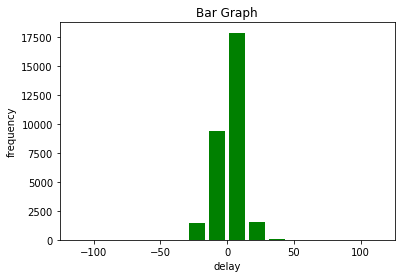

In [34]:
bins = [-120,-60,-45,-30,-15,0,15,30,45,60,120]
plt.hist(delay_list,bins,histtype='bar',rwidth=0.8,color='green')
plt.xlabel('delay')
plt.ylabel('frequency')
plt.title('Bar Graph')
plt.show

### Delay box plot

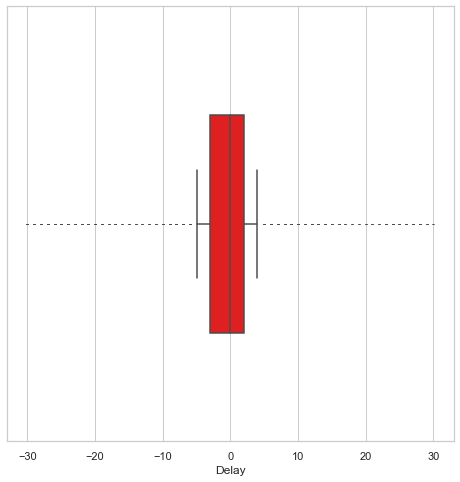

In [35]:
plt.figure(figsize=(8,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x=train_data['Delay'],width=0.5,color="red",whis=.4,fliersize=.3)

In [36]:
# max and min delay
print(min(delay_list))
print(max(delay_list))

-30
30


In [37]:
# upper and lower boundary of delay
IQR=train_data['Delay'].quantile(0.75)-train_data['Delay'].quantile(0.25)
lower_boundary=train_data['Delay'].quantile(0.25)-(IQR*3)
upper_boundary=train_data['Delay'].quantile(0.75)+(IQR*3)
print(lower_boundary)
print(upper_boundary)

-18.0
17.0


### creating delay_bucket

In [38]:
delay_bucket = pd.cut(delay_list,bins=bins)
delay_bucket.value_counts()

(-120, -60]        0
(-60, -45]         0
(-45, -30]        69
(-30, -15]      1468
(-15, 0]       15930
(0, 15]        11299
(15, 30]        1497
(30, 45]           0
(45, 60]           0
(60, 120]          0
dtype: int64

### Skewness in Delay Column

0.01991363457669697


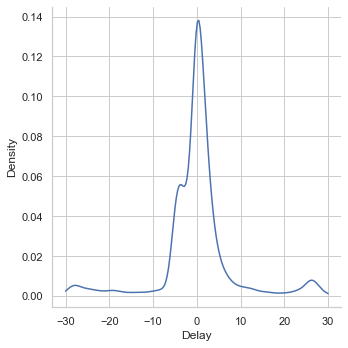

In [39]:
print(train_data['Delay'].skew())
sns.displot(train_data['Delay'],kind='kde',cut=0)

### Skewness in total_open_amount Column

2.149078867078554


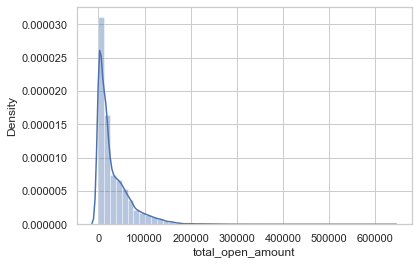

In [40]:
print(train_data['total_open_amount'].skew())
sns.distplot(train_data['total_open_amount'])

### using boxcox to normalize total_open_amount

-0.10910711621480157


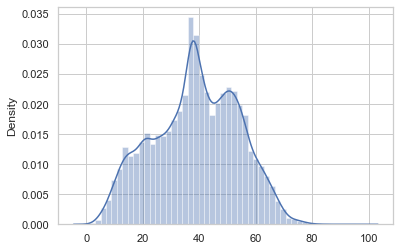

In [41]:
x2 = stats.boxcox(train_data['total_open_amount'])[0]
x3 = pd.Series(x2)
print(x3.skew())
sns.distplot(x2)

In [42]:
#box_cox column
train_data['box_cox_amount'] = x3

### creating bin for total_open_amount

In [43]:
bin1=[0,5000,10000,50000,100000,500000,7500000]
list1=list(train_data['total_open_amount'])
total_bucket=pd.cut(list1,bins=bin1)

In [44]:
pd.crosstab(index = total_bucket,columns = delay_bucket)

col_0,"(-45, -30]","(-30, -15]","(-15, 0]","(0, 15]","(15, 30]"
row_0,,,,,
"(0, 5000]",21,374,4074,2710,375
"(5000, 10000]",6,187,1433,1171,179
"(10000, 50000]",33,629,6710,4837,701
"(50000, 100000]",5,207,2775,1764,207
"(100000, 500000]",4,71,937,817,35
"(500000, 7500000]",0,0,1,0,0


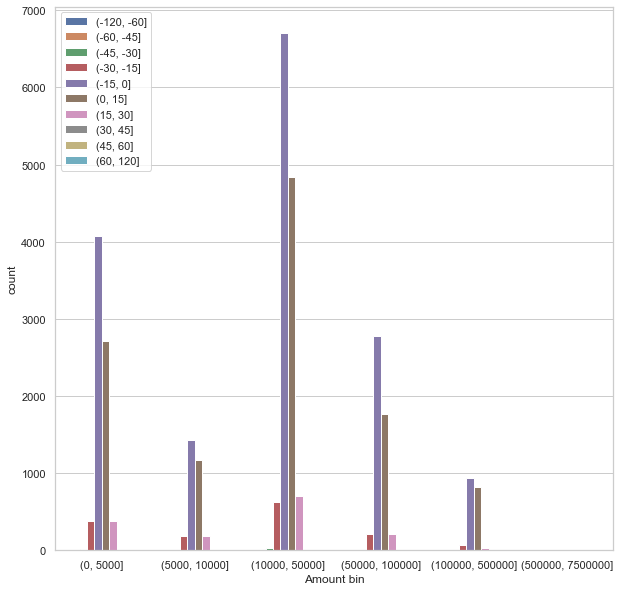

In [45]:
# Showing which delay range has what amount
plt.figure(figsize=(10,10))
plt.xlabel('Amount bin')
sns.countplot(x = total_bucket,hue=delay_bucket)

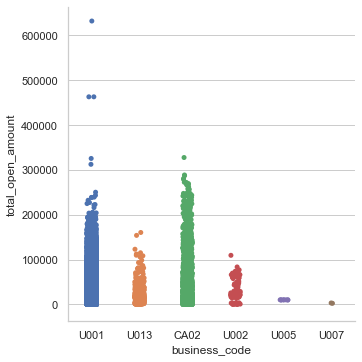

In [46]:
sns.catplot(x = 'business_code',y='total_open_amount',data=train_data,jitter=True)

###### Plot showing which business code has what amounts

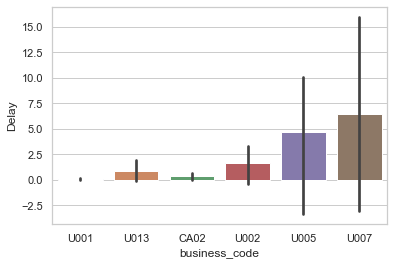

In [47]:
sns.barplot(x='business_code',y='Delay',data=train_data)

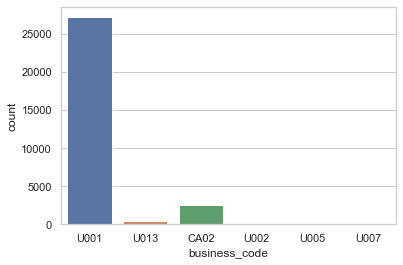

In [48]:
# showing count for each business code
sns.countplot(x='business_code', data=train_data)

### Showing comparison between due in date and delay

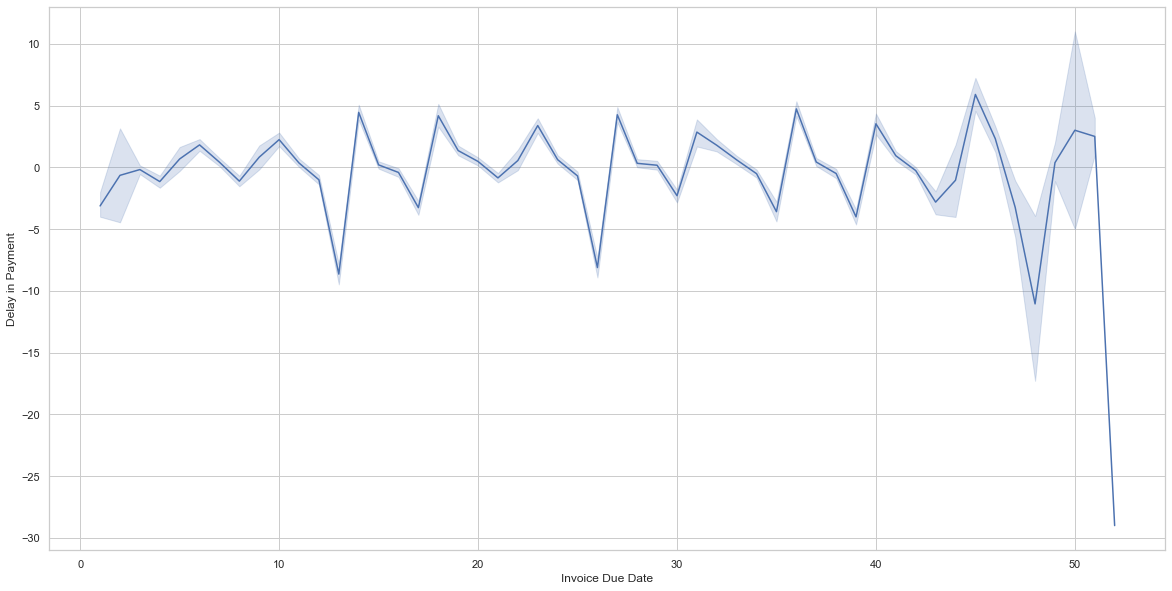

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(train_data['due_in_date'].dt.week,train_data['Delay'])
plt.xlabel("Invoice Due Date")
plt.ylabel("Delay in Payment")
plt.show()

# Mapping all the features into train_data

In [50]:
map_bcode_a = train_data.groupby('business_code')['total_open_amount'].agg('mean')
train_data['bcode_total_open_amount_avg'] = train_data['business_code'].map(map_bcode_a)

In [51]:
map_bcode_d = train_data.groupby('business_code')['Delay'].agg('mean')
train_data['bcode_delay_avg'] = train_data['business_code'].map(map_bcode_d)

In [52]:
#map_bcode_d

In [53]:
map_bcode_d = train_data.groupby('business_code')['Delay'].agg(np.sum)
train_data['bcode_delay_sum'] = train_data['business_code'].map(map_bcode_d)

In [54]:
#map_bcode_d

In [55]:
map_cust_p_a = train_data.groupby('cust_payment_terms')['total_open_amount'].agg('mean')
train_data['cust_pay_total_open_amount_avg'] = train_data['cust_payment_terms'].map(map_cust_p_a)

In [56]:
map_cust_p_d = train_data.groupby('cust_payment_terms')['Delay'].agg('mean')
train_data['cust_pay_delay_avg'] = train_data['cust_payment_terms'].map(map_cust_p_d)

In [57]:
map_cust_p_d = train_data.groupby('cust_payment_terms')['Delay'].agg(np.sum)
train_data['cust_pay_delay_sum'] = train_data['cust_payment_terms'].map(map_cust_p_d)

In [58]:
map_cust_no_a = train_data.groupby('cust_number')['total_open_amount'].agg('mean')
train_data['cust_no_total_open_amount_avg'] = train_data['cust_number'].map(map_cust_no_a)

In [59]:
map_cust_no_d = train_data.groupby('cust_number')['Delay'].agg('mean')
train_data['cust_no_delay_avg'] = train_data['cust_number'].map(map_cust_no_d)

In [60]:
train_data["early_payments"]=np.where(train_data['Delay']<0,1,0)

In [61]:
train_data['total_open_amount'].describe()

count     30263.000000
mean      31366.595008
std       36628.887563
min           2.800000
25%        5012.060000
50%       17283.500000
75%       46084.540000
max      632134.240000
Name: total_open_amount, dtype: float64

In [62]:
train_data['log_amount'] = np.log(train_data['total_open_amount']) #log transformation

In [63]:
train_data['document_create_month'] = train_data['document_create_date.1'].dt.month

In [64]:
train_data['dayofweek'] = train_data['document_create_date.1'].dt.dayofweek

In [65]:
train_data

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,...,bcode_delay_sum,cust_pay_total_open_amount_avg,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,early_payments,log_amount,document_create_month,dayofweek
37903,U001,200726979,BJ'S corporation,2019.0,1928541927,2018-12-30,2019-01-14,RV,89.75,2018-12-30,...,1395,36681.114133,-0.062725,-784,3853.371506,-0.500000,0,4.497028,12,6
34981,U001,CCU013,KRAFT F associates,2019.0,1928516979,2018-12-30,2018-12-30,RV,10689.05,2018-12-30,...,1395,12471.581402,1.420043,666,12637.837137,1.458874,1,9.276975,12,6
39921,U001,200762301,C&S WH in,2019.0,1928542930,2018-12-30,2019-01-14,RV,26125.08,2018-12-30,...,1395,49867.236278,-0.076555,-80,45491.833005,0.015385,0,10.170651,12,6
3916,U001,200744019,TARG systems,2019.0,1928540985,2018-12-30,2019-01-14,RV,7664.54,2018-12-30,...,1395,36681.114133,-0.062725,-784,22392.890988,-1.178144,0,8.944360,12,6
2471,U001,200769623,WAL-MAR corporation,2019.0,1928542582,2018-12-30,2019-01-14,RV,7497.67,2018-12-30,...,1395,22312.278962,-0.027153,-228,21432.096596,-0.053321,1,8.922348,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43983,U001,200769623,WAL-MAR trust,2019.0,1929972498,2019-10-07,2019-10-22,RV,67348.91,2019-10-07,...,1395,22312.278962,-0.027153,-228,21432.096596,-0.053321,0,11.117642,10,0
24356,CA02,140104472,MARTIN associates,2019.0,2960584896,2019-10-07,2019-10-25,RV,1235.52,2019-10-15,...,884,43943.603059,0.318852,778,6579.164038,1.333333,0,7.119247,10,0
30061,U001,200707822,PUBLI trust,2019.0,1929982507,2019-10-07,2019-10-22,RV,1794.44,2019-10-07,...,1395,36681.114133,-0.062725,-784,70044.121149,0.006897,0,7.492448,10,0
22575,U001,200729942,SA in,2019.0,1929974177,2019-10-07,2019-10-22,RV,3106.14,2019-10-07,...,1395,36681.114133,-0.062725,-784,14179.994214,0.094340,1,8.041136,10,0


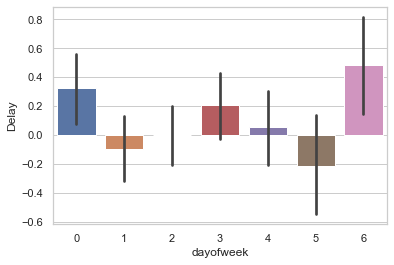

In [66]:
sns.barplot(x='dayofweek',y='Delay',data=train_data)

# Encoding

In [67]:
labelencoder = LabelEncoder()
train_data['cust_payment_terms'] = labelencoder.fit_transform(train_data['cust_payment_terms'])

In [68]:
labelencoder = LabelEncoder()
train_data['cust_number'] = labelencoder.fit_transform(train_data['cust_number'])

In [69]:
labelencoder = LabelEncoder()
train_data['business_code'] = labelencoder.fit_transform(train_data['business_code'])

In [70]:
#train_data['clear_date_quarter']=train_data['clear_date'].dt.quarter

In [71]:
temp_df = train_data.groupby('name_customer')['Delay'].agg(pd.Series.mean).to_dict()
train_data['name_customer'] = train_data['name_customer'].map(temp_df)
train_data

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,...,bcode_delay_sum,cust_pay_total_open_amount_avg,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,early_payments,log_amount,document_create_month,dayofweek
37903,1,706,-0.422414,2019.0,1928541927,2018-12-30,2019-01-14,RV,89.75,2018-12-30,...,1395,36681.114133,-0.062725,-784,3853.371506,-0.500000,0,4.497028,12,6
34981,1,980,2.196078,2019.0,1928516979,2018-12-30,2018-12-30,RV,10689.05,2018-12-30,...,1395,12471.581402,1.420043,666,12637.837137,1.458874,1,9.276975,12,6
39921,1,787,-0.130435,2019.0,1928542930,2018-12-30,2019-01-14,RV,26125.08,2018-12-30,...,1395,49867.236278,-0.076555,-80,45491.833005,0.015385,0,10.170651,12,6
3916,1,753,-2.415094,2019.0,1928540985,2018-12-30,2019-01-14,RV,7664.54,2018-12-30,...,1395,36681.114133,-0.062725,-784,22392.890988,-1.178144,0,8.944360,12,6
2471,1,804,-0.217910,2019.0,1928542582,2018-12-30,2019-01-14,RV,7497.67,2018-12-30,...,1395,22312.278962,-0.027153,-228,21432.096596,-0.053321,1,8.922348,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43983,1,804,-0.240385,2019.0,1929972498,2019-10-07,2019-10-22,RV,67348.91,2019-10-07,...,1395,22312.278962,-0.027153,-228,21432.096596,-0.053321,0,11.117642,10,0
24356,0,350,4.000000,2019.0,2960584896,2019-10-07,2019-10-25,RV,1235.52,2019-10-15,...,884,43943.603059,0.318852,778,6579.164038,1.333333,0,7.119247,10,0
30061,1,667,0.394737,2019.0,1929982507,2019-10-07,2019-10-22,RV,1794.44,2019-10-07,...,1395,36681.114133,-0.062725,-784,70044.121149,0.006897,0,7.492448,10,0
22575,1,713,-0.016393,2019.0,1929974177,2019-10-07,2019-10-22,RV,3106.14,2019-10-07,...,1395,36681.114133,-0.062725,-784,14179.994214,0.094340,1,8.041136,10,0


In [72]:
train_data['due_in_date_1']=train_data['due_in_date'].dt.quarter
train_data

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,...,cust_pay_total_open_amount_avg,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,early_payments,log_amount,document_create_month,dayofweek,due_in_date_1
37903,1,706,-0.422414,2019.0,1928541927,2018-12-30,2019-01-14,RV,89.75,2018-12-30,...,36681.114133,-0.062725,-784,3853.371506,-0.500000,0,4.497028,12,6,1
34981,1,980,2.196078,2019.0,1928516979,2018-12-30,2018-12-30,RV,10689.05,2018-12-30,...,12471.581402,1.420043,666,12637.837137,1.458874,1,9.276975,12,6,4
39921,1,787,-0.130435,2019.0,1928542930,2018-12-30,2019-01-14,RV,26125.08,2018-12-30,...,49867.236278,-0.076555,-80,45491.833005,0.015385,0,10.170651,12,6,1
3916,1,753,-2.415094,2019.0,1928540985,2018-12-30,2019-01-14,RV,7664.54,2018-12-30,...,36681.114133,-0.062725,-784,22392.890988,-1.178144,0,8.944360,12,6,1
2471,1,804,-0.217910,2019.0,1928542582,2018-12-30,2019-01-14,RV,7497.67,2018-12-30,...,22312.278962,-0.027153,-228,21432.096596,-0.053321,1,8.922348,12,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43983,1,804,-0.240385,2019.0,1929972498,2019-10-07,2019-10-22,RV,67348.91,2019-10-07,...,22312.278962,-0.027153,-228,21432.096596,-0.053321,0,11.117642,10,0,4
24356,0,350,4.000000,2019.0,2960584896,2019-10-07,2019-10-25,RV,1235.52,2019-10-15,...,43943.603059,0.318852,778,6579.164038,1.333333,0,7.119247,10,0,4
30061,1,667,0.394737,2019.0,1929982507,2019-10-07,2019-10-22,RV,1794.44,2019-10-07,...,36681.114133,-0.062725,-784,70044.121149,0.006897,0,7.492448,10,0,4
22575,1,713,-0.016393,2019.0,1929974177,2019-10-07,2019-10-22,RV,3106.14,2019-10-07,...,36681.114133,-0.062725,-784,14179.994214,0.094340,1,8.041136,10,0,4


# Heatmap showing correlation

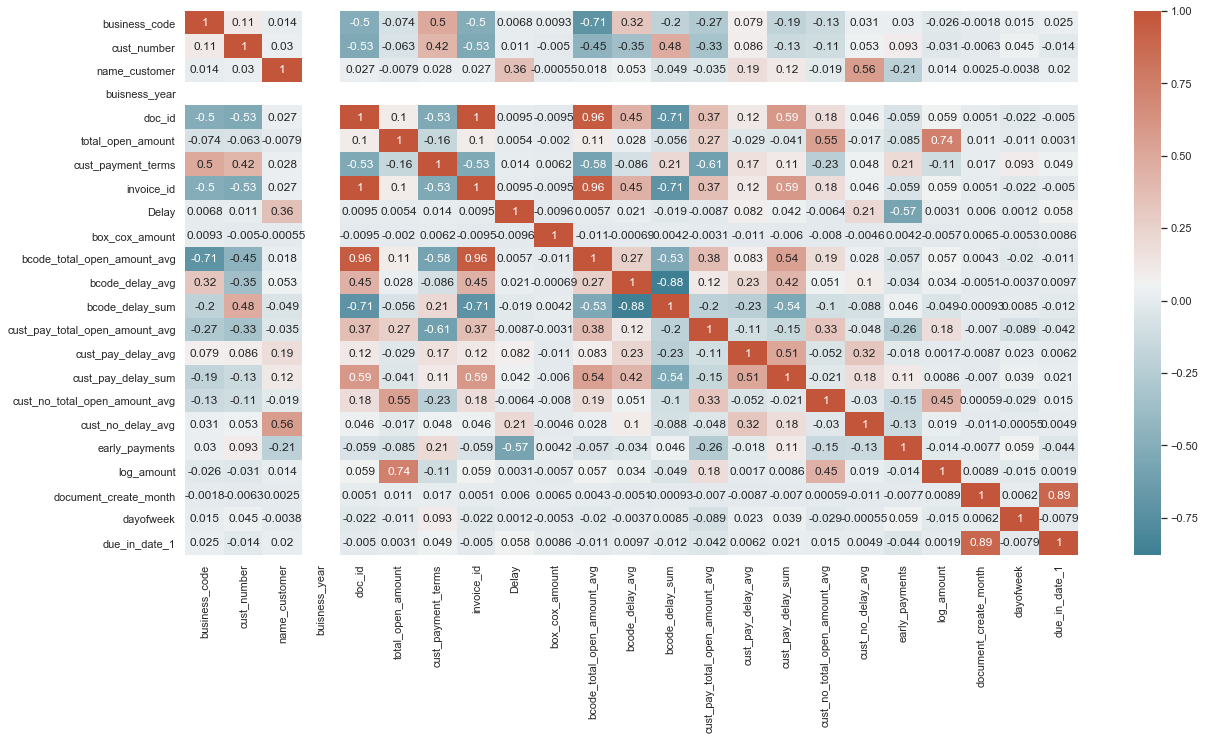

In [73]:
plt.figure(figsize=(20,10))
corr = train_data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [74]:
train_data

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,...,cust_pay_total_open_amount_avg,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,early_payments,log_amount,document_create_month,dayofweek,due_in_date_1
37903,1,706,-0.422414,2019.0,1928541927,2018-12-30,2019-01-14,RV,89.75,2018-12-30,...,36681.114133,-0.062725,-784,3853.371506,-0.500000,0,4.497028,12,6,1
34981,1,980,2.196078,2019.0,1928516979,2018-12-30,2018-12-30,RV,10689.05,2018-12-30,...,12471.581402,1.420043,666,12637.837137,1.458874,1,9.276975,12,6,4
39921,1,787,-0.130435,2019.0,1928542930,2018-12-30,2019-01-14,RV,26125.08,2018-12-30,...,49867.236278,-0.076555,-80,45491.833005,0.015385,0,10.170651,12,6,1
3916,1,753,-2.415094,2019.0,1928540985,2018-12-30,2019-01-14,RV,7664.54,2018-12-30,...,36681.114133,-0.062725,-784,22392.890988,-1.178144,0,8.944360,12,6,1
2471,1,804,-0.217910,2019.0,1928542582,2018-12-30,2019-01-14,RV,7497.67,2018-12-30,...,22312.278962,-0.027153,-228,21432.096596,-0.053321,1,8.922348,12,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43983,1,804,-0.240385,2019.0,1929972498,2019-10-07,2019-10-22,RV,67348.91,2019-10-07,...,22312.278962,-0.027153,-228,21432.096596,-0.053321,0,11.117642,10,0,4
24356,0,350,4.000000,2019.0,2960584896,2019-10-07,2019-10-25,RV,1235.52,2019-10-15,...,43943.603059,0.318852,778,6579.164038,1.333333,0,7.119247,10,0,4
30061,1,667,0.394737,2019.0,1929982507,2019-10-07,2019-10-22,RV,1794.44,2019-10-07,...,36681.114133,-0.062725,-784,70044.121149,0.006897,0,7.492448,10,0,4
22575,1,713,-0.016393,2019.0,1929974177,2019-10-07,2019-10-22,RV,3106.14,2019-10-07,...,36681.114133,-0.062725,-784,14179.994214,0.094340,1,8.041136,10,0,4


In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30263 entries, 37903 to 27907
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   30263 non-null  int32         
 1   cust_number                     30263 non-null  int32         
 2   name_customer                   30263 non-null  float64       
 3   buisness_year                   30263 non-null  float64       
 4   doc_id                          30263 non-null  int64         
 5   document_create_date.1          30263 non-null  datetime64[ns]
 6   due_in_date                     30263 non-null  datetime64[ns]
 7   document type                   30263 non-null  object        
 8   total_open_amount               30263 non-null  float64       
 9   baseline_create_date            30263 non-null  datetime64[ns]
 10  cust_payment_terms              30263 non-null  int32         
 11

In [76]:
[col for col in train_data ]

['business_code',
 'cust_number',
 'name_customer',
 'buisness_year',
 'doc_id',
 'document_create_date.1',
 'due_in_date',
 'document type',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'Delay',
 'box_cox_amount',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'bcode_delay_sum',
 'cust_pay_total_open_amount_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
 'cust_no_total_open_amount_avg',
 'cust_no_delay_avg',
 'early_payments',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'due_in_date_1']

# Inserting features

In [77]:
X1 = np.array(train_data[[ 
'business_code',
 'cust_number',
 'name_customer',
 'buisness_year',
 'doc_id',
 #'posting_date',
# 'document_create_date.1',
 #'due_in_date',
 #'invoice_currency',
 #'document type',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 #'Delay',
 #'box_cox_amount',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'bcode_delay_sum',
 'cust_pay_total_open_amount_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
 'cust_no_total_open_amount_avg',
 'cust_no_delay_avg',
 'early_payments',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'due_in_date_1']])

Y1=np.array(train_data['Delay'])

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.3,random_state=101)

## Training Model

In [79]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [80]:
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
y1_test_pred = clf.predict(x_test)

In [82]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y1_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y1_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y1_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y1_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y1_test_pred), 2))

Mean absolute error = 2.5
Mean squared error = 23.18
Median absolute error = 0.92
Explain variance score = 0.69
R2 score = 0.69


In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y1_test_pred, y_test))
rms

4.814850540286805

In [84]:
import xgboost as xgb
clf = xgb.XGBRegressor()

In [85]:
X1 = np.array(train_data[[ 
'business_code',
 'cust_number',
 'name_customer',
 'buisness_year',
 'doc_id',
 #'posting_date',
# 'document_create_date.1',
 #'due_in_date',
 #'invoice_currency',
 #'document type',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 #'Delay',
 #'box_cox_amount',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'bcode_delay_sum',
 'cust_pay_total_open_amount_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
 'cust_no_total_open_amount_avg',
 'cust_no_delay_avg',
 'early_payments',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'due_in_date_1']])

Y1=np.array(train_data['Delay'])

In [86]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.3,random_state=101)

In [87]:
clf.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [88]:
y1_test_pred = clf.predict(x_test)

In [89]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y1_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y1_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y1_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y1_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y1_test_pred), 2))

Mean absolute error = 2.81
Mean squared error = 23.38
Median absolute error = 1.32
Explain variance score = 0.69
R2 score = 0.69


In [90]:
rms = sqrt(mean_squared_error(y1_test_pred, y_test))
rms

4.835129624415448

# Mapping in validation sets

In [91]:
validation_1['name_customer'] = validation_1['name_customer'].map(temp_df)
validation_1

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
9990,U001,200762301,0.481928,2019.0,1929974145,2019-10-08,2019-10-23,RV,11520.72,2019-10-08,NAC6,1929974145,0
9638,U001,200790107,0.250000,2019.0,1929987259,2019-10-08,2019-10-23,RV,124217.10,2019-10-08,NAC6,1929987259,1
16681,CA02,140106408,-2.480000,2019.0,2960585319,2019-10-08,2019-10-19,RV,93645.03,2019-10-09,CA10,2960585319,10
40441,U001,200726979,-0.648649,2019.0,1929983410,2019-10-08,2019-10-23,RV,268.67,2019-10-08,NAA8,1929983410,0
31759,U001,200769623,0.398003,2019.0,1929983408,2019-10-08,2019-10-23,RV,13055.46,2019-10-08,NAH4,1929983408,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,U001,200769623,0.398003,2019.0,1930246952,2019-12-09,2019-12-24,RV,32693.44,2019-12-09,NAH4,1930246952,-5
7252,U001,200337148,-0.200000,2019.0,1930255779,2019-12-09,2019-12-24,RV,80360.44,2019-12-09,NAA8,1930255779,0
18815,U001,200769623,-0.298246,2019.0,1930249847,2019-12-09,2019-12-24,RV,43167.23,2019-12-09,NAH4,1930249847,-5
11259,U001,200726979,-0.832000,2019.0,1930250874,2019-12-09,2019-12-24,RV,288.23,2019-12-09,NAA8,1930250874,0


In [92]:
validation_2['name_customer'] = validation_2['name_customer'].map(temp_df)
validation_2

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
27363,U001,200769623,0.271659,2019.0,1930250074,2019-12-09,2019-12-24,RV,10542.6100,2019-12-09,NAH4,1930250074,-4
20456,U001,200515231,0.857143,2019.0,1930256200,2019-12-09,2019-12-29,RV,31306.9800,2019-12-09,NAD1,1930256200,1
15570,U001,200769623,-0.389430,2019.0,1930254527,2019-12-09,2019-12-24,RV,32663.0200,2019-12-09,NAH4,1930254527,-5
34305,U001,100050364,3.000000,2019.0,1930246890,2019-12-09,2019-12-24,RV,22869.9300,2019-12-09,NAA8,1930246890,3
10368,CA02,140104409,-4.321429,2019.0,2960598883,2019-12-09,2019-12-19,RV,127845.9825,2019-12-09,CA10,2960598883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,-0.753247,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.0900,2020-02-27,NAAX,1930573838,-1
22233,U001,200956366,8.000000,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.5600,2020-02-27,NAA8,1930580236,-7
41914,U001,200790107,-0.250000,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.0000,2020-02-27,NAC6,1930558980,-1
23178,U001,200759878,1.148515,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.3500,2020-02-27,NAH4,1930571568,6


In [93]:
validation_1['bcode_total_open_amount_avg'] = validation_1['business_code'].map(map_bcode_a)
validation_1

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg
9990,U001,200762301,0.481928,2019.0,1929974145,2019-10-08,2019-10-23,RV,11520.72,2019-10-08,NAC6,1929974145,0,30356.824573
9638,U001,200790107,0.250000,2019.0,1929987259,2019-10-08,2019-10-23,RV,124217.10,2019-10-08,NAC6,1929987259,1,30356.824573
16681,CA02,140106408,-2.480000,2019.0,2960585319,2019-10-08,2019-10-19,RV,93645.03,2019-10-09,CA10,2960585319,10,43749.989534
40441,U001,200726979,-0.648649,2019.0,1929983410,2019-10-08,2019-10-23,RV,268.67,2019-10-08,NAA8,1929983410,0,30356.824573
31759,U001,200769623,0.398003,2019.0,1929983408,2019-10-08,2019-10-23,RV,13055.46,2019-10-08,NAH4,1929983408,-5,30356.824573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,U001,200769623,0.398003,2019.0,1930246952,2019-12-09,2019-12-24,RV,32693.44,2019-12-09,NAH4,1930246952,-5,30356.824573
7252,U001,200337148,-0.200000,2019.0,1930255779,2019-12-09,2019-12-24,RV,80360.44,2019-12-09,NAA8,1930255779,0,30356.824573
18815,U001,200769623,-0.298246,2019.0,1930249847,2019-12-09,2019-12-24,RV,43167.23,2019-12-09,NAH4,1930249847,-5,30356.824573
11259,U001,200726979,-0.832000,2019.0,1930250874,2019-12-09,2019-12-24,RV,288.23,2019-12-09,NAA8,1930250874,0,30356.824573


In [94]:
validation_2['bcode_total_open_amount_avg'] = validation_2['business_code'].map(map_bcode_a)
validation_2

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg
27363,U001,200769623,0.271659,2019.0,1930250074,2019-12-09,2019-12-24,RV,10542.6100,2019-12-09,NAH4,1930250074,-4,30356.824573
20456,U001,200515231,0.857143,2019.0,1930256200,2019-12-09,2019-12-29,RV,31306.9800,2019-12-09,NAD1,1930256200,1,30356.824573
15570,U001,200769623,-0.389430,2019.0,1930254527,2019-12-09,2019-12-24,RV,32663.0200,2019-12-09,NAH4,1930254527,-5,30356.824573
34305,U001,100050364,3.000000,2019.0,1930246890,2019-12-09,2019-12-24,RV,22869.9300,2019-12-09,NAA8,1930246890,3,30356.824573
10368,CA02,140104409,-4.321429,2019.0,2960598883,2019-12-09,2019-12-19,RV,127845.9825,2019-12-09,CA10,2960598883,1,43749.989534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,-0.753247,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.0900,2020-02-27,NAAX,1930573838,-1,30356.824573
22233,U001,200956366,8.000000,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.5600,2020-02-27,NAA8,1930580236,-7,30356.824573
41914,U001,200790107,-0.250000,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.0000,2020-02-27,NAC6,1930558980,-1,30356.824573
23178,U001,200759878,1.148515,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.3500,2020-02-27,NAH4,1930571568,6,30356.824573


In [95]:
validation_1['bcode_delay_avg'] = validation_1['business_code'].map(map_bcode_d)
validation_1

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg
9990,U001,200762301,0.481928,2019.0,1929974145,2019-10-08,2019-10-23,RV,11520.72,2019-10-08,NAC6,1929974145,0,30356.824573,1395
9638,U001,200790107,0.250000,2019.0,1929987259,2019-10-08,2019-10-23,RV,124217.10,2019-10-08,NAC6,1929987259,1,30356.824573,1395
16681,CA02,140106408,-2.480000,2019.0,2960585319,2019-10-08,2019-10-19,RV,93645.03,2019-10-09,CA10,2960585319,10,43749.989534,884
40441,U001,200726979,-0.648649,2019.0,1929983410,2019-10-08,2019-10-23,RV,268.67,2019-10-08,NAA8,1929983410,0,30356.824573,1395
31759,U001,200769623,0.398003,2019.0,1929983408,2019-10-08,2019-10-23,RV,13055.46,2019-10-08,NAH4,1929983408,-5,30356.824573,1395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,U001,200769623,0.398003,2019.0,1930246952,2019-12-09,2019-12-24,RV,32693.44,2019-12-09,NAH4,1930246952,-5,30356.824573,1395
7252,U001,200337148,-0.200000,2019.0,1930255779,2019-12-09,2019-12-24,RV,80360.44,2019-12-09,NAA8,1930255779,0,30356.824573,1395
18815,U001,200769623,-0.298246,2019.0,1930249847,2019-12-09,2019-12-24,RV,43167.23,2019-12-09,NAH4,1930249847,-5,30356.824573,1395
11259,U001,200726979,-0.832000,2019.0,1930250874,2019-12-09,2019-12-24,RV,288.23,2019-12-09,NAA8,1930250874,0,30356.824573,1395


In [96]:
validation_2['bcode_delay_avg'] = validation_2['business_code'].map(map_bcode_d)
validation_2

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg
27363,U001,200769623,0.271659,2019.0,1930250074,2019-12-09,2019-12-24,RV,10542.6100,2019-12-09,NAH4,1930250074,-4,30356.824573,1395
20456,U001,200515231,0.857143,2019.0,1930256200,2019-12-09,2019-12-29,RV,31306.9800,2019-12-09,NAD1,1930256200,1,30356.824573,1395
15570,U001,200769623,-0.389430,2019.0,1930254527,2019-12-09,2019-12-24,RV,32663.0200,2019-12-09,NAH4,1930254527,-5,30356.824573,1395
34305,U001,100050364,3.000000,2019.0,1930246890,2019-12-09,2019-12-24,RV,22869.9300,2019-12-09,NAA8,1930246890,3,30356.824573,1395
10368,CA02,140104409,-4.321429,2019.0,2960598883,2019-12-09,2019-12-19,RV,127845.9825,2019-12-09,CA10,2960598883,1,43749.989534,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,-0.753247,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.0900,2020-02-27,NAAX,1930573838,-1,30356.824573,1395
22233,U001,200956366,8.000000,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.5600,2020-02-27,NAA8,1930580236,-7,30356.824573,1395
41914,U001,200790107,-0.250000,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.0000,2020-02-27,NAC6,1930558980,-1,30356.824573,1395
23178,U001,200759878,1.148515,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.3500,2020-02-27,NAH4,1930571568,6,30356.824573,1395


In [97]:
validation_1['bcode_delay_sum'] = validation_1['business_code'].map(map_bcode_d)
validation_1

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg,bcode_delay_sum
9990,U001,200762301,0.481928,2019.0,1929974145,2019-10-08,2019-10-23,RV,11520.72,2019-10-08,NAC6,1929974145,0,30356.824573,1395,1395
9638,U001,200790107,0.250000,2019.0,1929987259,2019-10-08,2019-10-23,RV,124217.10,2019-10-08,NAC6,1929987259,1,30356.824573,1395,1395
16681,CA02,140106408,-2.480000,2019.0,2960585319,2019-10-08,2019-10-19,RV,93645.03,2019-10-09,CA10,2960585319,10,43749.989534,884,884
40441,U001,200726979,-0.648649,2019.0,1929983410,2019-10-08,2019-10-23,RV,268.67,2019-10-08,NAA8,1929983410,0,30356.824573,1395,1395
31759,U001,200769623,0.398003,2019.0,1929983408,2019-10-08,2019-10-23,RV,13055.46,2019-10-08,NAH4,1929983408,-5,30356.824573,1395,1395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,U001,200769623,0.398003,2019.0,1930246952,2019-12-09,2019-12-24,RV,32693.44,2019-12-09,NAH4,1930246952,-5,30356.824573,1395,1395
7252,U001,200337148,-0.200000,2019.0,1930255779,2019-12-09,2019-12-24,RV,80360.44,2019-12-09,NAA8,1930255779,0,30356.824573,1395,1395
18815,U001,200769623,-0.298246,2019.0,1930249847,2019-12-09,2019-12-24,RV,43167.23,2019-12-09,NAH4,1930249847,-5,30356.824573,1395,1395
11259,U001,200726979,-0.832000,2019.0,1930250874,2019-12-09,2019-12-24,RV,288.23,2019-12-09,NAA8,1930250874,0,30356.824573,1395,1395


In [98]:
validation_2['bcode_delay_sum'] = validation_2['business_code'].map(map_bcode_d)
validation_2

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg,bcode_delay_sum
27363,U001,200769623,0.271659,2019.0,1930250074,2019-12-09,2019-12-24,RV,10542.6100,2019-12-09,NAH4,1930250074,-4,30356.824573,1395,1395
20456,U001,200515231,0.857143,2019.0,1930256200,2019-12-09,2019-12-29,RV,31306.9800,2019-12-09,NAD1,1930256200,1,30356.824573,1395,1395
15570,U001,200769623,-0.389430,2019.0,1930254527,2019-12-09,2019-12-24,RV,32663.0200,2019-12-09,NAH4,1930254527,-5,30356.824573,1395,1395
34305,U001,100050364,3.000000,2019.0,1930246890,2019-12-09,2019-12-24,RV,22869.9300,2019-12-09,NAA8,1930246890,3,30356.824573,1395,1395
10368,CA02,140104409,-4.321429,2019.0,2960598883,2019-12-09,2019-12-19,RV,127845.9825,2019-12-09,CA10,2960598883,1,43749.989534,884,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,-0.753247,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.0900,2020-02-27,NAAX,1930573838,-1,30356.824573,1395,1395
22233,U001,200956366,8.000000,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.5600,2020-02-27,NAA8,1930580236,-7,30356.824573,1395,1395
41914,U001,200790107,-0.250000,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.0000,2020-02-27,NAC6,1930558980,-1,30356.824573,1395,1395
23178,U001,200759878,1.148515,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.3500,2020-02-27,NAH4,1930571568,6,30356.824573,1395,1395


In [99]:
validation_1['cust_pay_total_open_amount_avg'] = validation_1['cust_payment_terms'].map(map_cust_p_a)
validation_1

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg,bcode_delay_sum,cust_pay_total_open_amount_avg
9990,U001,200762301,0.481928,2019.0,1929974145,2019-10-08,2019-10-23,RV,11520.72,2019-10-08,NAC6,1929974145,0,30356.824573,1395,1395,49867.236278
9638,U001,200790107,0.250000,2019.0,1929987259,2019-10-08,2019-10-23,RV,124217.10,2019-10-08,NAC6,1929987259,1,30356.824573,1395,1395,49867.236278
16681,CA02,140106408,-2.480000,2019.0,2960585319,2019-10-08,2019-10-19,RV,93645.03,2019-10-09,CA10,2960585319,10,43749.989534,884,884,43943.603059
40441,U001,200726979,-0.648649,2019.0,1929983410,2019-10-08,2019-10-23,RV,268.67,2019-10-08,NAA8,1929983410,0,30356.824573,1395,1395,36681.114133
31759,U001,200769623,0.398003,2019.0,1929983408,2019-10-08,2019-10-23,RV,13055.46,2019-10-08,NAH4,1929983408,-5,30356.824573,1395,1395,22312.278962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,U001,200769623,0.398003,2019.0,1930246952,2019-12-09,2019-12-24,RV,32693.44,2019-12-09,NAH4,1930246952,-5,30356.824573,1395,1395,22312.278962
7252,U001,200337148,-0.200000,2019.0,1930255779,2019-12-09,2019-12-24,RV,80360.44,2019-12-09,NAA8,1930255779,0,30356.824573,1395,1395,36681.114133
18815,U001,200769623,-0.298246,2019.0,1930249847,2019-12-09,2019-12-24,RV,43167.23,2019-12-09,NAH4,1930249847,-5,30356.824573,1395,1395,22312.278962
11259,U001,200726979,-0.832000,2019.0,1930250874,2019-12-09,2019-12-24,RV,288.23,2019-12-09,NAA8,1930250874,0,30356.824573,1395,1395,36681.114133


In [100]:
validation_2['cust_pay_total_open_amount_avg'] = validation_2['cust_payment_terms'].map(map_cust_p_a)
validation_2

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg,bcode_delay_sum,cust_pay_total_open_amount_avg
27363,U001,200769623,0.271659,2019.0,1930250074,2019-12-09,2019-12-24,RV,10542.6100,2019-12-09,NAH4,1930250074,-4,30356.824573,1395,1395,22312.278962
20456,U001,200515231,0.857143,2019.0,1930256200,2019-12-09,2019-12-29,RV,31306.9800,2019-12-09,NAD1,1930256200,1,30356.824573,1395,1395,23069.220034
15570,U001,200769623,-0.389430,2019.0,1930254527,2019-12-09,2019-12-24,RV,32663.0200,2019-12-09,NAH4,1930254527,-5,30356.824573,1395,1395,22312.278962
34305,U001,100050364,3.000000,2019.0,1930246890,2019-12-09,2019-12-24,RV,22869.9300,2019-12-09,NAA8,1930246890,3,30356.824573,1395,1395,36681.114133
10368,CA02,140104409,-4.321429,2019.0,2960598883,2019-12-09,2019-12-19,RV,127845.9825,2019-12-09,CA10,2960598883,1,43749.989534,884,884,43943.603059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,-0.753247,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.0900,2020-02-27,NAAX,1930573838,-1,30356.824573,1395,1395,22840.618586
22233,U001,200956366,8.000000,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.5600,2020-02-27,NAA8,1930580236,-7,30356.824573,1395,1395,36681.114133
41914,U001,200790107,-0.250000,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.0000,2020-02-27,NAC6,1930558980,-1,30356.824573,1395,1395,49867.236278
23178,U001,200759878,1.148515,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.3500,2020-02-27,NAH4,1930571568,6,30356.824573,1395,1395,22312.278962


In [101]:
validation_1['cust_pay_delay_avg'] = validation_1['cust_payment_terms'].map(map_cust_p_d)
validation_1

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg,bcode_delay_sum,cust_pay_total_open_amount_avg,cust_pay_delay_avg
9990,U001,200762301,0.481928,2019.0,1929974145,2019-10-08,2019-10-23,RV,11520.72,2019-10-08,NAC6,1929974145,0,30356.824573,1395,1395,49867.236278,-80.0
9638,U001,200790107,0.250000,2019.0,1929987259,2019-10-08,2019-10-23,RV,124217.10,2019-10-08,NAC6,1929987259,1,30356.824573,1395,1395,49867.236278,-80.0
16681,CA02,140106408,-2.480000,2019.0,2960585319,2019-10-08,2019-10-19,RV,93645.03,2019-10-09,CA10,2960585319,10,43749.989534,884,884,43943.603059,778.0
40441,U001,200726979,-0.648649,2019.0,1929983410,2019-10-08,2019-10-23,RV,268.67,2019-10-08,NAA8,1929983410,0,30356.824573,1395,1395,36681.114133,-784.0
31759,U001,200769623,0.398003,2019.0,1929983408,2019-10-08,2019-10-23,RV,13055.46,2019-10-08,NAH4,1929983408,-5,30356.824573,1395,1395,22312.278962,-228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,U001,200769623,0.398003,2019.0,1930246952,2019-12-09,2019-12-24,RV,32693.44,2019-12-09,NAH4,1930246952,-5,30356.824573,1395,1395,22312.278962,-228.0
7252,U001,200337148,-0.200000,2019.0,1930255779,2019-12-09,2019-12-24,RV,80360.44,2019-12-09,NAA8,1930255779,0,30356.824573,1395,1395,36681.114133,-784.0
18815,U001,200769623,-0.298246,2019.0,1930249847,2019-12-09,2019-12-24,RV,43167.23,2019-12-09,NAH4,1930249847,-5,30356.824573,1395,1395,22312.278962,-228.0
11259,U001,200726979,-0.832000,2019.0,1930250874,2019-12-09,2019-12-24,RV,288.23,2019-12-09,NAA8,1930250874,0,30356.824573,1395,1395,36681.114133,-784.0


In [102]:
validation_2['cust_pay_delay_avg'] = validation_2['cust_payment_terms'].map(map_cust_p_d)
validation_2

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,bcode_total_open_amount_avg,bcode_delay_avg,bcode_delay_sum,cust_pay_total_open_amount_avg,cust_pay_delay_avg
27363,U001,200769623,0.271659,2019.0,1930250074,2019-12-09,2019-12-24,RV,10542.6100,2019-12-09,NAH4,1930250074,-4,30356.824573,1395,1395,22312.278962,-228.0
20456,U001,200515231,0.857143,2019.0,1930256200,2019-12-09,2019-12-29,RV,31306.9800,2019-12-09,NAD1,1930256200,1,30356.824573,1395,1395,23069.220034,16.0
15570,U001,200769623,-0.389430,2019.0,1930254527,2019-12-09,2019-12-24,RV,32663.0200,2019-12-09,NAH4,1930254527,-5,30356.824573,1395,1395,22312.278962,-228.0
34305,U001,100050364,3.000000,2019.0,1930246890,2019-12-09,2019-12-24,RV,22869.9300,2019-12-09,NAA8,1930246890,3,30356.824573,1395,1395,36681.114133,-784.0
10368,CA02,140104409,-4.321429,2019.0,2960598883,2019-12-09,2019-12-19,RV,127845.9825,2019-12-09,CA10,2960598883,1,43749.989534,884,884,43943.603059,778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,U001,200794332,-0.753247,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.0900,2020-02-27,NAAX,1930573838,-1,30356.824573,1395,1395,22840.618586,-39.0
22233,U001,200956366,8.000000,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.5600,2020-02-27,NAA8,1930580236,-7,30356.824573,1395,1395,36681.114133,-784.0
41914,U001,200790107,-0.250000,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.0000,2020-02-27,NAC6,1930558980,-1,30356.824573,1395,1395,49867.236278,-80.0
23178,U001,200759878,1.148515,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.3500,2020-02-27,NAH4,1930571568,6,30356.824573,1395,1395,22312.278962,-228.0


In [103]:
# mapping in validation
validation_1['cust_pay_delay_sum'] = validation_1['cust_payment_terms'].map(map_cust_p_d)
validation_1['cust_no_total_open_amount_avg'] = validation_1['cust_number'].map(map_cust_no_a)
validation_1['cust_no_delay_avg'] = validation_1['cust_number'].map(map_cust_no_d)
validation_1["early_payments"]=np.where(validation_1['Delay']<0,1,0)
validation_1['cust_payment_terms'] = labelencoder.fit_transform(validation_1['cust_payment_terms'])
validation_1['cust_number'] = labelencoder.fit_transform(validation_1['cust_number'])
validation_1['business_code'] = labelencoder.fit_transform(validation_1['business_code'])
validation_1['log_amount'] = np.log(validation_1['total_open_amount']) 
validation_1['dayofweek'] = validation_1['document_create_date.1'].dt.dayofweek
validation_1['due_in_date_1']=validation_1['due_in_date'].dt.quarter
validation_1['document_create_month'] = validation_1['document_create_date.1'].dt.month
validation_1

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,...,cust_pay_total_open_amount_avg,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,early_payments,log_amount,dayofweek,due_in_date_1,document_create_month
9990,1,370,0.481928,2019.0,1929974145,2019-10-08,2019-10-23,RV,11520.72,2019-10-08,...,49867.236278,-80.0,-80.0,45491.833005,0.015385,0,9.351902,1,4,10
9638,1,426,0.250000,2019.0,1929987259,2019-10-08,2019-10-23,RV,124217.10,2019-10-08,...,49867.236278,-80.0,-80.0,74055.353654,0.019231,0,11.729786,1,4,10
16681,0,159,-2.480000,2019.0,2960585319,2019-10-08,2019-10-19,RV,93645.03,2019-10-09,...,43943.603059,778.0,778.0,38010.722130,-0.507246,0,11.447267,1,4,10
40441,1,322,-0.648649,2019.0,1929983410,2019-10-08,2019-10-23,RV,268.67,2019-10-08,...,36681.114133,-784.0,-784.0,3853.371506,-0.500000,0,5.593484,1,4,10
31759,1,384,0.398003,2019.0,1929983408,2019-10-08,2019-10-23,RV,13055.46,2019-10-08,...,22312.278962,-228.0,-228.0,21432.096596,-0.053321,1,9.476962,1,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,1,384,0.398003,2019.0,1930246952,2019-12-09,2019-12-24,RV,32693.44,2019-12-09,...,22312.278962,-228.0,-228.0,21432.096596,-0.053321,1,10.394930,0,4,12
7252,1,206,-0.200000,2019.0,1930255779,2019-12-09,2019-12-24,RV,80360.44,2019-12-09,...,36681.114133,-784.0,-784.0,37535.518182,-0.038961,0,11.294277,0,4,12
18815,1,384,-0.298246,2019.0,1930249847,2019-12-09,2019-12-24,RV,43167.23,2019-12-09,...,22312.278962,-228.0,-228.0,21432.096596,-0.053321,1,10.672837,0,4,12
11259,1,322,-0.832000,2019.0,1930250874,2019-12-09,2019-12-24,RV,288.23,2019-12-09,...,36681.114133,-784.0,-784.0,3853.371506,-0.500000,0,5.663759,0,4,12


In [104]:
# mapping in validation
validation_2['cust_pay_delay_sum'] = validation_2['cust_payment_terms'].map(map_cust_p_d)
validation_2['cust_no_total_open_amount_avg'] = validation_2['cust_number'].map(map_cust_no_a)
validation_2['cust_no_delay_avg'] = validation_2['cust_number'].map(map_cust_no_d)
validation_2["early_payments"]=np.where(validation_2['Delay']<0,1,0)
validation_2['cust_payment_terms'] = labelencoder.fit_transform(validation_2['cust_payment_terms'])
validation_2['cust_number'] = labelencoder.fit_transform(validation_2['cust_number'])
validation_2['business_code'] = labelencoder.fit_transform(validation_2['business_code'])
validation_2['log_amount'] = np.log(validation_2['total_open_amount']) 
validation_2['dayofweek'] = validation_2['document_create_date.1'].dt.dayofweek
validation_2['due_in_date_1']=validation_2['due_in_date'].dt.quarter
validation_2['document_create_month'] = validation_2['document_create_date.1'].dt.month
validation_2

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,...,cust_pay_total_open_amount_avg,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,early_payments,log_amount,dayofweek,due_in_date_1,document_create_month
27363,1,423,0.271659,2019.0,1930250074,2019-12-09,2019-12-24,RV,10542.6100,2019-12-09,...,22312.278962,-228.0,-228.0,21432.096596,-0.053321,1,9.263180,0,4,12
20456,1,275,0.857143,2019.0,1930256200,2019-12-09,2019-12-29,RV,31306.9800,2019-12-09,...,23069.220034,16.0,16.0,32747.024583,2.833333,0,10.351596,0,4,12
15570,1,423,-0.389430,2019.0,1930254527,2019-12-09,2019-12-24,RV,32663.0200,2019-12-09,...,22312.278962,-228.0,-228.0,21432.096596,-0.053321,1,10.393999,0,4,12
34305,1,95,3.000000,2019.0,1930246890,2019-12-09,2019-12-24,RV,22869.9300,2019-12-09,...,36681.114133,-784.0,-784.0,17559.915556,1.888889,0,10.037578,0,4,12
10368,0,147,-4.321429,2019.0,2960598883,2019-12-09,2019-12-19,RV,127845.9825,2019-12-09,...,43943.603059,778.0,778.0,85713.011125,-0.305136,0,11.758582,0,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23421,1,481,-0.753247,2020.0,1930573838,2020-02-27,2020-03-13,RV,8793.0900,2020-02-27,...,22840.618586,-39.0,-39.0,22755.362787,0.002445,1,9.081721,3,1,2
22233,1,524,8.000000,2020.0,1930580236,2020-02-27,2020-03-13,RV,51919.5600,2020-02-27,...,36681.114133,-784.0,-784.0,44547.560769,0.000000,1,10.857451,3,1,2
41914,1,464,-0.250000,2020.0,1930558980,2020-02-27,2020-03-13,RV,17285.0000,2020-02-27,...,49867.236278,-80.0,-80.0,74055.353654,0.019231,1,9.757594,3,1,2
23178,1,405,1.148515,2020.0,1930571568,2020-02-27,2020-03-13,RV,14329.3500,2020-02-27,...,22312.278962,-228.0,-228.0,32851.386671,0.440421,0,9.570065,3,1,2


In [105]:
X1 = np.array(validation_1[[ 
'business_code',
 'cust_number',
 'name_customer',
 'buisness_year',
 'doc_id',
 #'posting_date',
# 'document_create_date.1',
 #'due_in_date',
 #'invoice_currency',
 #'document type',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 #'Delay',
 #'box_cox_amount',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'bcode_delay_sum',
 'cust_pay_total_open_amount_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
 'cust_no_total_open_amount_avg',
 'cust_no_delay_avg',
 'early_payments',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'due_in_date_1']])

Y1=np.array(validation_1['Delay'])

In [106]:
val1_train_x,val1_test_x,val1_train_y,val1_test_y = train_test_split(X1,Y1,test_size=0.3,random_state=101)

In [107]:
val1_pred = clf.predict(val1_test_x)

In [108]:
print("Mean absolute error =", round(sm.mean_absolute_error(val1_test_y,val1_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(val1_pred, val1_test_y), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(val1_pred, val1_test_y), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(val1_pred, val1_test_y), 2)) 
print("R2 score =", round(sm.r2_score(val1_pred, val1_test_y), 2))
print("RMSE = ",sqrt(sm.mean_squared_error(val1_pred, val1_test_y)))

Mean absolute error = 4.27
Mean squared error = 49.47
Median absolute error = 2.31
Explain variance score = -0.43
R2 score = -0.44
RMSE =  7.033646310277366


In [109]:
X1 = np.array(validation_2[[ 
'business_code',
 'cust_number',
 'name_customer',
 'buisness_year',
 'doc_id',
 #'posting_date',
# 'document_create_date.1',
 #'due_in_date',
 #'invoice_currency',
 #'document type',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 #'Delay',
 #'box_cox_amount',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'bcode_delay_sum',
 'cust_pay_total_open_amount_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
 'cust_no_total_open_amount_avg',
 'cust_no_delay_avg',
 'early_payments',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'due_in_date_1']])

Y1=np.array(validation_2['Delay'])

In [110]:
val2_train_x,val2_test_x,val2_train_y,val2_test_y = train_test_split(X1,Y1,test_size=0.3,random_state=101)

In [111]:
val2_pred = clf.predict(val2_test_x)

In [112]:
print("Mean absolute error =", round(sm.mean_absolute_error(val2_test_y,val2_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(val2_pred, val2_test_y), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(val2_pred, val2_test_y), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(val2_pred, val2_test_y), 2)) 
print("R2 score =", round(sm.r2_score(val2_pred, val2_test_y), 2))
print("RMSE = ",sqrt(sm.mean_squared_error(val2_pred, val2_test_y)))

Mean absolute error = 6.23
Mean squared error = 86.94
Median absolute error = 3.35
Explain variance score = -0.26
R2 score = -0.72
RMSE =  9.324396687656092


# Working on test data

In [113]:
#########################

In [114]:
test_data=test_data.drop(['document_create_date'],axis=1)
test_data['posting_date'] = pd.to_datetime(test_data['posting_date'], format='%Y/%m/%d')
test_data['baseline_create_date'] = pd.to_datetime(test_data['baseline_create_date'], format='%Y%m%d')
test_data['document_create_date.1'] = pd.to_datetime(test_data['document_create_date.1'].astype(str), format='%Y-%m-%d')
test_data['clear_date'] = pd.to_datetime(test_data['clear_date'].astype(str), format='%Y-%m-%d')
test_data['due_in_date'] = pd.to_datetime(test_data['due_in_date'], format='%Y%m%d')
rest_data['cust_number']=rest_data['cust_number'].apply(lambda x:str(x).lstrip("0"))

# Removing any row with any null value and null column 
test_data.dropna(how='all',inplace=True,axis=1)
test_data.dropna(how='any',inplace=True,axis=0)

# Convert scientific notation to integers in invoice_id and doc_id
test_data['invoice_id']=test_data['invoice_id']=rest_data['invoice_id'].apply(lambda x: int(float(x)))
test_data['doc_id']=test_data['invoice_id']=rest_data['doc_id'].apply(lambda x: int(float(x)))
#test_data=test_data.drop(['posting_date'],axis=1)
test_data.drop(test_data[test_data['document_create_date.1']>test_data['baseline_create_date']].index,inplace=True)
#test_data.drop(test_data[test_data['baseline_create_date']>test_data['clear_date']].index,inplace=True)
test_data=test_data.sort_values(by=['document_create_date.1'])

test_data

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49304,U001,0200708411,SHAM associates,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,52913.62,2020-02-27,NAA8,NaN,1
49213,U001,0200707822,PUBLI in,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,82305.43,2020-02-27,NAA8,NaN,1
47604,U001,0200762301,C&S WH,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,26374.13,2020-02-27,NAC6,NaN,1
49198,U001,0200769623,WAL-MAR,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,59366.14,2020-02-27,NAH4,NaN,1
49174,U001,CCCA02,KRAFT corporation,2020.0,NaN,2020-02-27,2020-02-27,2020-04-02,USD,RV,1.0,8537.28,2020-02-27,NAG2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49580,U001,0200765011,MAINES associates,2020.0,NaN,2020-05-14,2020-05-14,2020-05-29,USD,RV,1.0,28049.25,2020-05-14,NAA8,NaN,1
47649,CA02,100012991,CJR WH foundation,2020.0,NaN,2020-05-14,2020-05-14,2020-05-25,CAD,RV,1.0,2725.08,2020-05-15,CA10,NaN,1
45420,CA02,0140105785,SHOPPE corp,2020.0,NaN,2020-05-19,2020-05-19,2020-05-29,CAD,RV,1.0,807.12,2020-05-19,CA10,NaN,1
48902,U001,0200765011,MAINES corp,2020.0,NaN,2020-05-19,2020-05-19,2020-06-03,USD,RV,1.0,27984.87,2020-05-19,NAA8,NaN,1


In [115]:
# mapping in test data
test_data['name_customer'] = test_data['name_customer'].map(temp_df)
test_data['bcode_total_open_amount_avg'] = test_data['business_code'].map(map_bcode_a)
test_data['bcode_delay_avg'] = test_data['business_code'].map(map_bcode_d)
test_data['bcode_delay_sum'] = test_data['business_code'].map(map_bcode_d)
test_data['cust_pay_total_open_amount_avg'] =test_data['cust_payment_terms'].map(map_cust_p_a)
test_data['cust_pay_delay_avg'] = test_data['cust_payment_terms'].map(map_cust_p_d)
test_data['cust_pay_delay_sum'] =test_data['cust_payment_terms'].map(map_cust_p_d)
test_data['cust_no_total_open_amount_avg'] = test_data['cust_number'].map(map_cust_no_a)
test_data['cust_no_delay_avg'] = test_data['cust_number'].map(map_cust_no_d)
#test_data["early_payments"]=np.where(test_data['Delay']<0,1,0)
test_data['cust_payment_terms'] = labelencoder.fit_transform(test_data['cust_payment_terms'])
test_data['cust_number'] = labelencoder.fit_transform(test_data['cust_number'])
test_data['business_code'] = labelencoder.fit_transform(test_data['business_code'])
test_data['log_amount'] = np.log(test_data['total_open_amount']) 
test_data['dayofweek'] = test_data['document_create_date.1'].dt.dayofweek
test_data['due_in_date_1']=test_data['due_in_date'].dt.quarter
test_data['document_create_month'] = test_data['document_create_date.1'].dt.month

test_data

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,...,bcode_delay_sum,cust_pay_total_open_amount_avg,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,log_amount,dayofweek,due_in_date_1,document_create_month
49304,1,224,-8.000000,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,1395,36681.114133,-784.0,-784.0,NaN,NaN,10.876416,3,1,2
49213,1,223,0.641026,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,1395,36681.114133,-784.0,-784.0,NaN,NaN,11.318192,3,1,2
47604,1,281,0.088235,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,1395,49867.236278,-80.0,-80.0,NaN,NaN,10.180139,3,1,2
49198,1,292,0.271659,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,1395,22312.278962,-228.0,-228.0,NaN,NaN,10.991479,3,1,2
49174,1,483,5.921053,2020.0,NaN,2020-02-27,2020-02-27,2020-04-02,USD,RV,...,1395,22882.955176,1473.0,1473.0,21258.129868,2.320106,9.052198,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49580,1,286,1.600000,2020.0,NaN,2020-05-14,2020-05-14,2020-05-29,USD,RV,...,1395,36681.114133,-784.0,-784.0,NaN,NaN,10.241717,3,2,5
47649,0,382,NaN,2020.0,NaN,2020-05-14,2020-05-14,2020-05-25,CAD,RV,...,884,43943.603059,778.0,778.0,18361.498125,-2.000000,7.910253,3,2,5
45420,0,109,1.500000,2020.0,NaN,2020-05-19,2020-05-19,2020-05-29,CAD,RV,...,884,43943.603059,778.0,778.0,NaN,NaN,6.693472,1,2,5
48902,1,286,0.000000,2020.0,NaN,2020-05-19,2020-05-19,2020-06-03,USD,RV,...,1395,36681.114133,-784.0,-784.0,NaN,NaN,10.239419,1,2,5


-0.11412591210815372


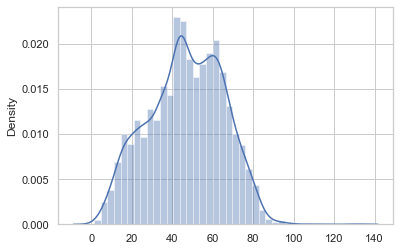

In [116]:
x2 = stats.boxcox(test_data['total_open_amount'])[0]
x3 = pd.Series(x2)
print(x3.skew())
sns.distplot(x2)

In [117]:
test_data['box_cox_amount'] = x3

In [118]:
X1 = np.array(test_data[[ 
'business_code',
 'cust_number',
 'name_customer',
 'buisness_year',
 'doc_id',
 #'posting_date',
# 'document_create_date.1',
 #'due_in_date',
 #'invoice_currency',
 #'document type',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 #'Delay',
 'box_cox_amount',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'bcode_delay_sum',
 'cust_pay_total_open_amount_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
 'cust_no_total_open_amount_avg',
 'cust_no_delay_avg',
# 'early_payments',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'due_in_date_1']])


In [119]:
predicted = clf.predict(X1)

In [120]:
predicted

array([3.0397127, 4.4718366, 5.4971404, ..., 3.7876074, 2.2723904,
       2.5229201], dtype=float32)

In [121]:
test_data['new_delay'] = " "
test_data

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,...,cust_pay_delay_avg,cust_pay_delay_sum,cust_no_total_open_amount_avg,cust_no_delay_avg,log_amount,dayofweek,due_in_date_1,document_create_month,box_cox_amount,new_delay
49304,1,224,-8.000000,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,-784.0,-784.0,NaN,NaN,10.876416,3,1,2,NaN,
49213,1,223,0.641026,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,-784.0,-784.0,NaN,NaN,11.318192,3,1,2,NaN,
47604,1,281,0.088235,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,-80.0,-80.0,NaN,NaN,10.180139,3,1,2,NaN,
49198,1,292,0.271659,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,-228.0,-228.0,NaN,NaN,10.991479,3,1,2,NaN,
49174,1,483,5.921053,2020.0,NaN,2020-02-27,2020-02-27,2020-04-02,USD,RV,...,1473.0,1473.0,21258.129868,2.320106,9.052198,3,2,2,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49580,1,286,1.600000,2020.0,NaN,2020-05-14,2020-05-14,2020-05-29,USD,RV,...,-784.0,-784.0,NaN,NaN,10.241717,3,2,5,NaN,
47649,0,382,NaN,2020.0,NaN,2020-05-14,2020-05-14,2020-05-25,CAD,RV,...,778.0,778.0,18361.498125,-2.000000,7.910253,3,2,5,NaN,
45420,0,109,1.500000,2020.0,NaN,2020-05-19,2020-05-19,2020-05-29,CAD,RV,...,778.0,778.0,NaN,NaN,6.693472,1,2,5,NaN,
48902,1,286,0.000000,2020.0,NaN,2020-05-19,2020-05-19,2020-06-03,USD,RV,...,-784.0,-784.0,NaN,NaN,10.239419,1,2,5,NaN,


In [122]:
test_data['new_delay']=predicted

In [123]:
temp = test_data['new_delay'].apply(np.ceil).apply(lambda x:pd.Timedelta(x, unit='D'))

In [124]:
test_data['predicted_clear_date'] = test_data['due_in_date']+temp

# Aging bucket and final prediction

In [125]:
test_data['aging_bucket'] = ""
test_data.loc[test_data['new_delay'].apply(int)>60,'aging_bucket'] = ">60"
test_data.loc[(test_data['new_delay'].apply(int)>= 46) & (test_data['new_delay'].apply(int)<= 60),'aging_bucket'] ="46-60"
test_data.loc[(test_data['new_delay'].apply(int)>= 31) & (test_data['new_delay'].apply(int)<= 45),'aging_bucket'] ="31-45"
test_data.loc[(test_data['new_delay'].apply(int)<= 30) & (test_data['new_delay'].apply(int)>= 16),'aging_bucket'] ="16-30"
test_data.loc[(test_data['new_delay'].apply(int)<= 15) & (test_data['new_delay'].apply(int)>0),'aging_bucket']  = "0-15"
test_data.loc[test_data['new_delay'].apply(int)<=0,'aging_bucket'] = "< 0"

In [126]:
test_data

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,...,cust_no_total_open_amount_avg,cust_no_delay_avg,log_amount,dayofweek,due_in_date_1,document_create_month,box_cox_amount,new_delay,predicted_clear_date,aging_bucket
49304,1,224,-8.000000,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,NaN,NaN,10.876416,3,1,2,NaN,3.039713,2020-03-17,0-15
49213,1,223,0.641026,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,NaN,NaN,11.318192,3,1,2,NaN,4.471837,2020-03-18,0-15
47604,1,281,0.088235,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,NaN,NaN,10.180139,3,1,2,NaN,5.497140,2020-03-19,0-15
49198,1,292,0.271659,2020.0,NaN,2020-02-27,2020-02-27,2020-03-13,USD,RV,...,NaN,NaN,10.991479,3,1,2,NaN,2.422310,2020-03-16,0-15
49174,1,483,5.921053,2020.0,NaN,2020-02-27,2020-02-27,2020-04-02,USD,RV,...,21258.129868,2.320106,9.052198,3,2,2,NaN,-4.047267,2020-03-29,< 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49580,1,286,1.600000,2020.0,NaN,2020-05-14,2020-05-14,2020-05-29,USD,RV,...,NaN,NaN,10.241717,3,2,5,NaN,4.121579,2020-06-03,0-15
47649,0,382,NaN,2020.0,NaN,2020-05-14,2020-05-14,2020-05-25,CAD,RV,...,18361.498125,-2.000000,7.910253,3,2,5,NaN,5.516543,2020-05-31,0-15
45420,0,109,1.500000,2020.0,NaN,2020-05-19,2020-05-19,2020-05-29,CAD,RV,...,NaN,NaN,6.693472,1,2,5,NaN,3.787607,2020-06-02,0-15
48902,1,286,0.000000,2020.0,NaN,2020-05-19,2020-05-19,2020-06-03,USD,RV,...,NaN,NaN,10.239419,1,2,5,NaN,2.272390,2020-06-06,0-15
